In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers 
import nltk
from nltk.corpus import cmudict
import re
import string
import librosa.display
from nltk.corpus import stopwords
from collections import Counter
#import Ipython
#from glob import tqdm

In [3]:
!pip install wordcloud

     -------------------------------------- 152.1/152.1 kB 1.0 MB/s eta 0:00:00


In [4]:
from wordcloud import WordCloud,STOPWORDS
# import vaex

In [5]:
import gc
import librosa 
import IPython.display  as ipd
import os
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional
from keras.layers import TimeDistributed, Activation, Input
from keras.optimizers import Adam
from keras import backend as K

In [7]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [56]:
#Paper: Dysarthic Speech Recognition Using a Deep-BiDirectional LSTM(and CTC decoder)

# Here we train a SRS on dysarthic using DBLSTM and CTC decoder,we have selected DBLSTM coz of the inconsistency of acoustic cues in speech patterns
# so that its memory cell can handle inconsistent temporal behaviour.
path="C:\\Users\\lalit\\Downloads\\UASpeech_original_FM-006\\Speech\\UASpeech\\audio\\original"
def load_audio_files(path):
    audio_files=[]
    labels=[]
    for root,dirs,files in os.walk(path):
        for file in files:
            if file.endswith('.wav'):
                file_path=os.path.join(root,file)
                label=os.path.basename(file)
                audio_files.append(file_path)
                labels.append(label)
    return audio_files,labels

In [57]:
audio_files,labels=load_audio_files(path)

In [77]:
def extract_features(audio_files):  # extracting the features
    features=[]
    for file in audio_files:
        y,sr=librosa.load(file,mono=True,sr=None)
        #y=tf.squeeze(y,axis=1)
        sr=tf.cast(sr,dtype=tf.int64)
        if(len(y)<1024):
            continue
        mfcc=librosa.feature.mfcc(y=y,sr=sr,n_mels=128,n_fft=512,hop_length=256)
        features.append(np.mean(mfcc.T, axis=0))
    return features

In [80]:
y,sr=librosa.load(audio_file,mono=True,sr=None)

NameError: name 'audio_file' is not defined

In [78]:
print(f"Total audio files loaded: {len(audio_files)}")

Total audio files loaded: 73950


In [79]:
y

array([    0,     1,     2, ..., 49997, 49998, 49999])

In [2]:
# features = extract_features(audio_files)

In [ ]:
data=pd.DataFrame(features)
data['labels']=labels
data.to_csv('mfcc_features.csv', index=False)

In [ ]:
y,sr=librosa.load(audio_files[0],mono=True,sr=None)
mfcc=librosa.feature.mfcc(y=y,sr=sr)
plt.figure(figsize=(10,4))
librosa.display.specshow(mfcc,x_axis='time',sr=sr)
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()

In [ ]:
mel = librosa.feature.melspectrogram(y=y, sr=sr)  # MelSpectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(mel, ref=np.max), y_axis='mel', fmax=8000, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-spectrogram')
plt.tight_layout()
plt.show()

In [ ]:
chroma = librosa.feature.chroma_stft(y=y, sr=sr)  #chroma Feature
plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chroma Feature')
plt.tight_layout()
plt.show()

In [ ]:
# Spectral contrast
contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
plt.figure(figsize=(10, 4))
librosa.display.specshow(contrast, x_axis='time')
plt.colorbar()
plt.title('Spectral Contrast')
plt.tight_layout()
plt.show()

In [ ]:
# Tonnetz
tonnetz = librosa.feature.tonnetz(y=y, sr=sr)
plt.figure(figsize=(10, 4))
librosa.display.specshow(tonnetz, y_axis='tonnetz', x_axis='time')
plt.colorbar()
plt.title('Tonnetz')
plt.tight_layout()
plt.show()

In [ ]:
data = pd.DataFrame(features)
data['label'] = labels
data.to_csv('extended_features.csv', index=False)

X = data.drop('label', axis=1)
y = data['label']

In [19]:
#import extended_features

In [5]:
data=pd.read_csv("C:\\Users\\lalit\\Downloads\\extended_features.csv",nrows=50000)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,label
0,-811.05680,45.902130,19.140290,9.023891,7.511540,8.710886,2.293996,1.195024,4.520778,4.797452,...,1.841492,-2.959309,-5.087962,2.841738,0.437973,-1.503307,3.254498,-4.348630,-1.706384,F02_B1_C10_M2.wav
1,-719.61750,49.435030,18.089783,5.685719,6.818338,8.482253,2.060754,2.972921,4.696923,4.724075,...,2.401142,-3.975966,-5.282817,3.053698,-0.078903,-0.062314,2.114049,-3.308333,-0.745085,F02_B1_C10_M3.wav
2,-821.76050,47.402120,26.449219,14.184918,13.665656,16.468971,8.625183,9.497687,10.496236,9.784162,...,6.291968,0.526903,0.719797,5.020544,3.085440,3.319707,4.145844,-0.845407,2.737591,F02_B1_C10_M4.wav
3,-732.15234,64.335680,26.442814,12.102163,12.451935,17.673680,9.011706,8.357615,12.202501,8.754129,...,6.749905,-1.648389,-3.148938,7.526160,2.098095,2.938144,4.762268,-2.727687,3.829699,F02_B1_C10_M5.wav
4,-683.45300,60.665447,14.820672,-0.801313,2.427120,6.883616,-0.889883,-0.858550,3.433881,3.105703,...,2.479502,-4.224957,-6.509067,3.487858,-0.479200,0.517788,2.687584,-5.093039,0.754057,F02_B1_C10_M6.wav


In [6]:
data.dtypes

0        float64
1        float64
2        float64
3        float64
4        float64
5        float64
6        float64
7        float64
8        float64
9        float64
10       float64
11       float64
12       float64
13       float64
14       float64
15       float64
16       float64
17       float64
18       float64
19       float64
label     object
dtype: object

In [7]:
# X = data.drop('label', axis=1)
X = data.iloc[: ,:-1].values
y = data['label'].values

In [10]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(y).reshape(-1,1)).toarray()

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

MemoryError: Unable to allocate 14.0 GiB for an array with shape (37500, 50000) and data type float64

In [8]:
#LabelEncoder
from sklearn.preprocessing import LabelEncoder
convertor = LabelEncoder()

In [9]:
y=convertor.fit_transform(y)

In [3]:
import vaex

In [10]:
# X = np.array((X-np.min(X))/(np.max(X)-np.min(X)))
# X = X/np.std(X)
# y = np.array(y)
from sklearn.preprocessing import StandardScaler
fit=StandardScaler()
X=fit.fit_transform(np.array(X,dtype=float))

In [8]:
X_train ,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33)

In [29]:
# X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

In [49]:
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)
# #Print the shapes
# X_train.shape, X_test.shape, X_val.shape, len(y_train), len(y_test), len(y_val)  #Extract training, test and validation datasets
X_train[1]

array([-1.89083669, -0.83126885,  0.73136858,  0.33133438,  0.13484343,
        0.7402749 , -0.13008882,  0.38592122,  1.4146292 ,  1.27299598,
        1.78549249,  0.5679594 ,  1.04385432,  1.17572522,  0.56781112,
        1.11733632,  0.59517286,  0.13704157,  0.68751166,  0.42677626])

In [50]:
X_train.shape[1]

20

In [31]:
X_test.shape

(16500, 20)

In [32]:
y_train.shape

(33500,)

In [33]:
y_test.shape

(16500,)

In [35]:
len(y_test),len(y_train)

(16500, 33500)

In [44]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X_train=scaler.fit(X_train).transform(X_train)
# X_test=scaler.fit(X_test).transform(X_test)
def trainModel(model,epochs,optimizer):
    batch_size =128
    model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics='accuracy'
    )
    return model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=epochs,batch_size=batch_size)

In [45]:
def plotValidate(history):
    print("Validation Accuracy",max(history.history["val_accuracy"]))
    pd.Dataframe(history.history).plot(figsize=(12,6))
    plt.show()
# I apply Principal Component Analysis on the dataset

In [54]:
import keras as k

In [55]:
model=k.models.Sequential([
    k.layers.Dense(512,activation='relu',input_shape=(X_train.shape[1],)),
    k.layers.Dropout(0.2),
    k.layers.Dense(256,activation='relu'),
    k.layers.Dropout(0.2),
    k.layers.Dense(128,activation='relu'),
    k.layers.Dropout(0.2),
    k.layers.Dense(64,activation='relu'),
    k.layers.Dropout(0.2),
    k.layers.Dense(50000,activation='softmax'),   
])
print(model.summary())
model_history=trainModel(model=model,epochs=600,optimizer='adam')

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 512)               10752     
_________________________________________________________________
dropout_20 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_21 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_22 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 64)               

Epoch 98/600
262/262 [==============================] - 33s 125ms/step - loss: 3.5394 - accuracy: 0.1834 - val_loss: 32.7398 - val_accuracy: 0.0000e+00
Epoch 99/600
262/262 [==============================] - 33s 125ms/step - loss: 3.5407 - accuracy: 0.1862 - val_loss: 33.0384 - val_accuracy: 0.0000e+00
Epoch 100/600
262/262 [==============================] - 33s 126ms/step - loss: 3.5036 - accuracy: 0.1920 - val_loss: 33.0730 - val_accuracy: 0.0000e+00
Epoch 101/600
262/262 [==============================] - 33s 126ms/step - loss: 3.4771 - accuracy: 0.1990 - val_loss: 33.2148 - val_accuracy: 0.0000e+00
Epoch 102/600
262/262 [==============================] - 33s 126ms/step - loss: 3.4815 - accuracy: 0.1973 - val_loss: 33.4508 - val_accuracy: 0.0000e+00
Epoch 103/600
262/262 [==============================] - 33s 126ms/step - loss: 3.4455 - accuracy: 0.2008 - val_loss: 33.2006 - val_accuracy: 0.0000e+00
Epoch 104/600
262/262 [==============================] - 33s 127ms/step - loss: 3.46

KeyboardInterrupt: 

In [53]:
test_loss, test_acc = model.evaluate(X_test,y_test,batch_size=128)
print("The test Loss is:",test_loss)
print("\nThe Best test Accuracy is:",test_acc*100)

129/129 [==============================] - 12s 91ms/step - loss: 34.2069 - accuracy: 0.0000e+00
The test Loss is: 34.20689010620117

The Best test Accuracy is: 0.0


In [16]:
X_train.shape # for each 51765 video we have 20 dimensions

(51765, 20)

In [12]:
from sklearn.decomposition import PCA
 
pca = PCA(n_components = 3)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       50000 non-null  float64
 1   1       50000 non-null  float64
 2   2       50000 non-null  float64
 3   3       50000 non-null  float64
 4   4       50000 non-null  float64
 5   5       50000 non-null  float64
 6   6       50000 non-null  float64
 7   7       50000 non-null  float64
 8   8       50000 non-null  float64
 9   9       50000 non-null  float64
 10  10      50000 non-null  float64
 11  11      50000 non-null  float64
 12  12      50000 non-null  float64
 13  13      50000 non-null  float64
 14  14      50000 non-null  float64
 15  15      50000 non-null  float64
 16  16      50000 non-null  float64
 17  17      50000 non-null  float64
 18  18      50000 non-null  float64
 19  19      50000 non-null  float64
 20  label   50000 non-null  object 
dtypes: float64(20), object(1)
memory us

In [14]:
X_train.shape 

(33500, 3)

In [ ]:
rfc = RandomForestClassifier(n_estimators=2)  # RandomForest Classifier
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)

In [ ]:
print("Random Forest Classifier accuracy:", accuracy_score(y_test, y_pred_rfc))

In [ ]:
ada = AdaBoostClassifier(n_estimators=100, random_state=42)     # Ada Boost Classifier
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)

gbc = GradientBoostingClassifier(n_estimators=100, random_state=42)  # Gradient Boost Classifier
gbc.fit(X_train, y_train)
y_pred_gbc = gbc.predict(X_test)

In [ ]:
print("AdaBoost Classifier accuracy:", accuracy_score(y_test, y_pred_ada))
print("Gradient Boosting Classifier accuracy:", accuracy_score(y_test, y_pred_gbc))

accuracies = [accuracy_score(y_test, y_pred_rfc), accuracy_score(y_test, y_pred_ada), accuracy_score(y_test, y_pred_gbc)]
labels = ['Random Forest', 'AdaBoost', 'Gradient Boosting']
plt.bar(labels, accuracies)
plt.xlabel('Ensemble Method')
plt.ylabel('Accuracy')
plt.title('Ensemble Methods Accuracy Comparison')
plt.show()

In [74]:
from tensorflow.keras.layers import Embedding
# embedding_vecor_length = 32
# model = Sequential()
# model.add(Embedding(X_train, embedding_vecor_length, input_length=y_train))
# model.add(LSTM(100))
# model.add(Dense(1, activation='sigmoid'))
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# print(model.summary())
# model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=64)

In [12]:
print(dir(X_train)) # to check if the data or object is iterable or not

['T', '_AXIS_LEN', '_AXIS_ORDERS', '_AXIS_REVERSED', '_AXIS_TO_AXIS_NUMBER', '_HANDLED_TYPES', '__abs__', '__add__', '__and__', '__annotations__', '__array__', '__array_priority__', '__array_ufunc__', '__array_wrap__', '__bool__', '__class__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__divmod__', '__doc__', '__eq__', '__finalize__', '__floordiv__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__imod__', '__imul__', '__init__', '__init_subclass__', '__invert__', '__ior__', '__ipow__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__lt__', '__matmul__', '__mod__', '__module__', '__mul__', '__ne__', '__neg__', '__new__', '__nonzero__', '__or__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdivmod__', '__reduce__', '__reduce_ex__', '__repr__', '__rfloordiv__', '__rmatmul__', '__rmod__', '__rmul

In [10]:
input_shape=(26250,20)
model = keras.Sequential()    # try range
model.add(LSTM(256,input_shape=X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(48, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(50000, activation='softmax'))
model.summary()

TypeError: Dimension value must be integer or None or have an __index__ method, got value ''0'' with type '<class 'str'>'

In [30]:
# The algorithm takes input 1 audio file of 1 word spoken. Its passed through DBLSTM, the output is a phonetic transription of word.
# each subject was asked to recite a total of 756 words.
#The words in dataset consiste of digits(0,1 etc),the International radio alphabet(the,of,) and uncommon words(naturalization,frugality etc)
# the data is split randomly in a ratio of 84-8-8.
# before giving to BDLSTm preprocessing is done on it(normalized filter banks are foud by appliying pre-emphasis filter,fourier transfrm,triangle filter,normalization for time windows of 10ms.)

#Eg fig1 audio signal and its normalized filter bank for word paste

In [31]:
filename="E:\\Education\\sem 10\\recordings\\test"
plt.figure(figsize=(12,4)) # only for a selected folder
for file in os.listdir(filename):
    print(file)

1249120_13842059_104469105.wav
1249120_13842059_105045085.wav
1249120_13842059_11964685.wav
1249120_13842059_12420758.wav
1249120_13842059_13041979.wav
1249120_13842059_15629457.wav
1249120_13842059_17269028.wav
1249120_13842059_18087389.wav
1249120_13842059_18949363.wav
1249120_13842059_19016138.wav
1249120_13842059_19662889.wav
1249120_13842059_19800134.wav
1249120_13842059_19948105.wav
1249120_13842059_20699980.wav
1249120_13842059_20940439.wav
1249120_13842059_21651846.wav
1249120_13842059_21818546.wav
1249120_13842059_21836537.wav
1249120_13842059_24545917.wav
1249120_13842059_25097031.wav
1249120_13842059_25244471.wav
1249120_13842059_28311301.wav
1249120_13842059_28742137.wav
1249120_13842059_30159617.wav
1249120_13842059_33116980.wav
1249120_13842059_34188483.wav
1249120_13842059_35254053.wav
1249120_13842059_35924031.wav
1249120_13842059_36985247.wav
1249120_13842059_39081294.wav
1249120_13842059_39489825.wav
1249120_13842059_39765754.wav
1249120_13842059_40335111.wav
1249120_

1249120_30937687_101572696.wav
1249120_30937687_103531596.wav
1249120_30937687_103886595.wav
1249120_30937687_10543328.wav
1249120_30937687_106027604.wav
1249120_30937687_107572150.wav
1249120_30937687_109425304.wav
1249120_30937687_11144796.wav
1249120_30937687_12153894.wav
1249120_30937687_12696097.wav
1249120_30937687_13139749.wav
1249120_30937687_13387986.wav
1249120_30937687_15276683.wav
1249120_30937687_15305633.wav
1249120_30937687_16453717.wav
1249120_30937687_17619915.wav
1249120_30937687_18307176.wav
1249120_30937687_23214556.wav
1249120_30937687_23676583.wav
1249120_30937687_25676909.wav
1249120_30937687_27530206.wav
1249120_30937687_31026245.wav
1249120_30937687_31889643.wav
1249120_30937687_32336267.wav
1249120_30937687_36280199.wav
1249120_30937687_36936851.wav
1249120_30937687_38439738.wav
1249120_30937687_43377541.wav
1249120_30937687_44523908.wav
1249120_30937687_46662263.wav
1249120_30937687_47455564.wav
1249120_30937687_47602318.wav
1249120_30937687_50465655.wav
1249

1249120_38202325_38077190.wav
1249120_38202325_39643496.wav
1249120_38202325_39897085.wav
1249120_38202325_40303876.wav
1249120_38202325_41385737.wav
1249120_38202325_43535296.wav
1249120_38202325_44913081.wav
1249120_38202325_47724212.wav
1249120_38202325_48371991.wav
1249120_38202325_48631172.wav
1249120_38202325_51627146.wav
1249120_38202325_52726093.wav
1249120_38202325_52816548.wav
1249120_38202325_55954075.wav
1249120_38202325_56024369.wav
1249120_38202325_56157201.wav
1249120_38202325_56462566.wav
1249120_38202325_57283948.wav
1249120_38202325_57751307.wav
1249120_38202325_59222981.wav
1249120_38202325_59711134.wav
1249120_38202325_59839581.wav
1249120_38202325_60138012.wav
1249120_38202325_62654255.wav
1249120_38202325_64723639.wav
1249120_38202325_64727047.wav
1249120_38202325_65855788.wav
1249120_38202325_66152395.wav
1249120_38202325_67793192.wav
1249120_38202325_68073791.wav
1249120_38202325_68309216.wav
1249120_38202325_69183925.wav
1249120_38202325_69913258.wav
1249120_38

1249120_41221824_66224590.wav
1249120_41221824_67451204.wav
1249120_41221824_68542464.wav
1249120_41221824_70399750.wav
1249120_41221824_77354488.wav
1249120_41221824_78844006.wav
1249120_41221824_87022620.wav
1249120_41221824_88751046.wav
1249120_41221824_89002742.wav
1249120_41221824_89077016.wav
1249120_41221824_89559598.wav
1249120_41221824_91506557.wav
1249120_41221824_91847334.wav
1249120_41221824_92696666.wav
1249120_41221824_95724337.wav
1249120_41221824_97265260.wav
1249120_41221824_98578452.wav
1249120_41336418_103081263.wav
1249120_41336418_103238583.wav
1249120_41336418_104466918.wav
1249120_41336418_105172543.wav
1249120_41336418_109163013.wav
1249120_41336418_109766894.wav
1249120_41336418_11043473.wav
1249120_41336418_11200775.wav
1249120_41336418_11717772.wav
1249120_41336418_12513515.wav
1249120_41336418_13832272.wav
1249120_41336418_15412005.wav
1249120_41336418_15490172.wav
1249120_41336418_17897401.wav
1249120_41336418_17908476.wav
1249120_41336418_24770421.wav
1249

1249120_43665783_76225384.wav
1249120_43665783_76916477.wav
1249120_43665783_77636024.wav
1249120_43665783_77956782.wav
1249120_43665783_81206122.wav
1249120_43665783_83727523.wav
1249120_43665783_83977966.wav
1249120_43665783_84776699.wav
1249120_43665783_86075834.wav
1249120_43665783_92661820.wav
1249120_43665783_95015838.wav
1249120_43665783_96408087.wav
1249120_43665783_96982071.wav
1249120_43665783_97238538.wav
1249120_43665783_97584858.wav
1249120_43665783_98876934.wav
1249120_43665783_99565954.wav
1249120_43698316_101462703.wav
1249120_43698316_108187672.wav
1249120_43698316_18502702.wav
1249120_43698316_20601320.wav
1249120_43698316_23877867.wav
1249120_43698316_31372195.wav
1249120_43698316_36155159.wav
1249120_43698316_43698203.wav
1249120_43698316_43777134.wav
1249120_43698316_44781503.wav
1249120_43698316_45973843.wav
1249120_43698316_48464965.wav
1249120_43698316_49739996.wav
1249120_43698316_51078636.wav
1249120_43698316_55838876.wav
1249120_43698316_56837634.wav
1249120_

1249120_44093303_102661113.wav
1249120_44093303_106607375.wav
1249120_44093303_108819586.wav
1249120_44093303_109446583.wav
1249120_44093303_14534665.wav
1249120_44093303_14753603.wav
1249120_44093303_17200675.wav
1249120_44093303_18686987.wav
1249120_44093303_26852380.wav
1249120_44093303_27805651.wav
1249120_44093303_28602828.wav
1249120_44093303_28714152.wav
1249120_44093303_28822636.wav
1249120_44093303_30897263.wav
1249120_44093303_33087221.wav
1249120_44093303_34578569.wav
1249120_44093303_34863185.wav
1249120_44093303_39503128.wav
1249120_44093303_39622828.wav
1249120_44093303_39908025.wav
1249120_44093303_40127281.wav
1249120_44093303_40512559.wav
1249120_44093303_45609357.wav
1249120_44093303_55786254.wav
1249120_44093303_56370832.wav
1249120_44093303_57046343.wav
1249120_44093303_62497539.wav
1249120_44093303_72445253.wav
1249120_44093303_75327647.wav
1249120_44093303_75550383.wav
1249120_44093303_75980942.wav
1249120_44093303_77397638.wav
1249120_44093303_79586973.wav
124912

1249120_44263136_92015834.wav
1249120_44263136_93647784.wav
1249120_44263136_93996655.wav
1249120_44263136_94477614.wav
1249120_44263136_95817458.wav
1249120_44273314_102521547.wav
1249120_44273314_103514863.wav
1249120_44273314_104690533.wav
1249120_44273314_106435928.wav
1249120_44273314_106442057.wav
1249120_44273314_107500628.wav
1249120_44273314_109807607.wav
1249120_44273314_13390025.wav
1249120_44273314_16049788.wav
1249120_44273314_16303816.wav
1249120_44273314_17246181.wav
1249120_44273314_18787091.wav
1249120_44273314_21492329.wav
1249120_44273314_21942140.wav
1249120_44273314_24711015.wav
1249120_44273314_25005396.wav
1249120_44273314_26783687.wav
1249120_44273314_28827187.wav
1249120_44273314_30937230.wav
1249120_44273314_31089974.wav
1249120_44273314_31545094.wav
1249120_44273314_32293213.wav
1249120_44273314_35569629.wav
1249120_44273314_38073414.wav
1249120_44273314_38687390.wav
1249120_44273314_40698632.wav
1249120_44273314_45479897.wav
1249120_44273314_45748543.wav
124

<Figure size 864x288 with 0 Axes>

In [32]:
#Extracting Features from Data
ipd.Audio("C:\\Users\\lalit\\Downloads\\UASpeech_original_FM-006\\Speech\\UASpeech\\audio\\original\\M01\\M01_B2_CW91_M6.wav")

In [33]:
def feature_extraction(file):
    x,sample_rate=librosa.load(file,res_type="kaiser_fast")
    mfcc=np.mean(librosa.feature.mfcc(y=x,sr=sample_rate,n_mfcc=100).T,axis=0)
    return mfcc

In [34]:
df=pd.read_csv("E:\\Education\\sem 10\\overview-of-recordings.csv")

In [35]:
df.head()

,audio_clipping,audio_clipping:confidence,background_noise_audible,background_noise_audible:confidence,overall_quality_of_the_audio,quiet_speaker,quiet_speaker:confidence,speaker_id,file_download,file_name,phrase,prompt,writer_id
0,no_clipping,1.0000,light_noise,1.0000,3.33,audible_speaker,1.0,43453425,https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...,1249120_43453425_58166571.wav,When I remember her I feel down,Emotional pain,21665495
1,light_clipping,0.6803,no_noise,0.6803,3.33,audible_speaker,1.0,43719934,https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...,1249120_43719934_43347848.wav,When I carry heavy things I feel like breaking...,Hair falling out,44088126
2,no_clipping,1.0000,no_noise,0.6655,3.33,audible_speaker,1.0,43719934,https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...,1249120_43719934_53187202.wav,there is too much pain when i move my arm,Heart hurts,44292353
3,no_clipping,1.0000,light_noise,1.0000,3.33,audible_speaker,1.0,31349958,https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...,1249120_31349958_55816195.wav,My son had his lip pierced and it is swollen a...,Infected wound,43755034
4,no_clipping,1.0000,no_noise,1.0000,4.67,audible_speaker,1.0,43719934,https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...,1249120_43719934_82524191.wav,My muscles in my lower back are aching,Infected wound,21665495


In [36]:
df.isnull().sum()

audio_clipping                         0
audio_clipping:confidence              0
background_noise_audible               0
background_noise_audible:confidence    0
overall_quality_of_the_audio           0
quiet_speaker                          0
quiet_speaker:confidence               0
speaker_id                             0
file_download                          0
file_name                              0
phrase                                 0
prompt                                 0
writer_id                              0
dtype: int64

In [37]:
from nltk.stem import PorterStemmer
import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

In [38]:
cv=CountVectorizer()
cv.fit(df['phrase'])
result=cv.transform(df['phrase'])
print(result.shape)

(6661, 1147)


In [39]:
# prompt : it tells us the medical problem category
# phrase : it tells us the text speaker spoke
# filename : it tells us the name of the file    # we will be taking these 3 things into account while training the data

In [40]:
cv1=CountVectorizer()
cv1.fit(df['prompt'])
result1=cv1.transform(df['prompt'])
print(result.shape)

(6661, 1147)


In [41]:
df['prompt'].value_counts()

Acne                  328
Shoulder pain         320
Joint pain            318
Infected wound        306
Knee pain             305
Cough                 293
Feeling dizzy         283
Muscle pain           282
Heart hurts           273
Ear ache              270
Hair falling out      264
Head ache             263
Feeling cold          263
Skin issue            262
Stomach ache          261
Back pain             259
Neck pain             251
Internal pain         248
Blurry vision         246
Body feels weak       241
Hard to breath        233
Emotional pain        231
Injury from sports    230
Foot ache             223
Open wound            208
Name: prompt, dtype: int64

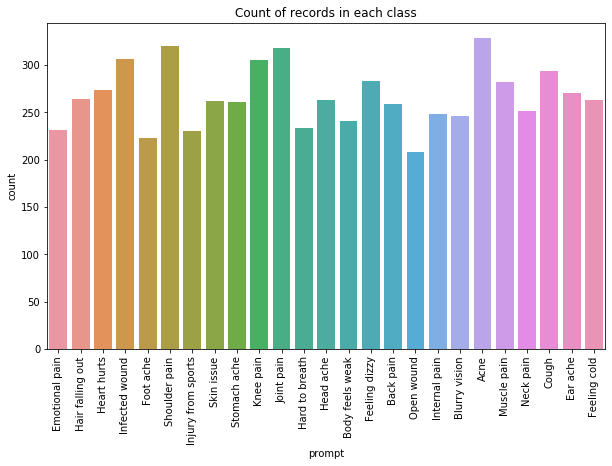

In [42]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(df['prompt'])
plt.title("Count of records in each class")
plt.xticks(rotation="vertical")
plt.show()

In [43]:
def EDA1(df):
    print(f"The number of rows are {df.shape[0]} and {df.shape[1]} columns." )
    print(df.info())
EDA1(df)

The number of rows are 6661 and 13 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6661 entries, 0 to 6660
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   audio_clipping                       6661 non-null   object 
 1   audio_clipping:confidence            6661 non-null   float64
 2   background_noise_audible             6661 non-null   object 
 3   background_noise_audible:confidence  6661 non-null   float64
 4   overall_quality_of_the_audio         6661 non-null   float64
 5   quiet_speaker                        6661 non-null   object 
 6   quiet_speaker:confidence             6661 non-null   float64
 7   speaker_id                           6661 non-null   int64  
 8   file_download                        6661 non-null   object 
 9   file_name                            6661 non-null   object 
 10  phrase                               6661 non-null  

In [44]:
# We check for duplicates:
def remove_duplicates(df):
    dup=df.duplicated().sum()
    print("The number of duplicates is",dup)
    if(dup>=1):
        df.drop_duplicates(inplace=True)
    else:
        print("No Duplicates found in data")
remove_duplicates(df)

The number of duplicates is 0
No Duplicates found in data


In [45]:
df1=df[['phrase','prompt']]
df1.head()

,phrase,prompt
0,When I remember her I feel down,Emotional pain
1,When I carry heavy things I feel like breaking...,Hair falling out
2,there is too much pain when i move my arm,Heart hurts
3,My son had his lip pierced and it is swollen a...,Infected wound
4,My muscles in my lower back are aching,Infected wound


In [46]:
# !pip install spacy
#import spacy
#from spacy.lang.en.stop_words import STOP_WORDS

In [47]:
def clean_txt(docs):
    lemmatizer = WordNetLemmatizer() 
    # split into words
    speech_words = nltk.word_tokenize(docs)
    # convert to lower case
    lower_text = [w.lower() for w in speech_words]
    # prepare regex for char filtering
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    # remove punctuation from each word
    stripped = [re_punc.sub('', w) for w in lower_text]
    # remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
    # filter out stop words
    words = [w for w in words if not w in  list(STOPWORDS)]
    # filter out short tokens
    words = [word for word in words if len(word) > 2]
    #Stemm all the words in the sentence
    lem_words = [lemmatizer.lemmatize(word) for word in words]
    combined_text = ' '.join(lem_words)
    return combined_text

# Cleaning the text data
df1['cleaned_phrase'] = df1['phrase'].apply(clean_txt)
df1

C:\Users\lalit\anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,phrase,prompt,cleaned_phrase
0,When I remember her I feel down,Emotional pain,remember feel
1,When I carry heavy things I feel like breaking...,Hair falling out,carry heavy thing feel breaking back
2,there is too much pain when i move my arm,Heart hurts,much pain move arm
3,My son had his lip pierced and it is swollen a...,Infected wound,son lip pierced swollen skin inside lip grey l...
4,My muscles in my lower back are aching,Infected wound,muscle lower back aching
...,...,...,...
6656,I feel a burning sensation in my guts about 2 ...,Stomach ache,feel burning sensation gut hour meal
6657,I have a split on my thumb that will not heal.,Open wound,split thumb will heal
6658,I feel a lot of pain in the joints.,Joint pain,feel lot pain joint
6659,The area around my heart doesn't feel good.,Heart hurts,area around heart feel good


In [48]:
def feature_extraction(file):
    x,sample_rate=librosa.load(file,res_type="kaiser_fast")
    mfcc=np.mean(librosa.feature.mfcc(y=x,sr=sample_rate,n_mfcc=100).T,axis=0)
    return mfcc

In [49]:
import numpy as np
from tqdm import tqdm

features=[]
for index_num,row in tqdm(df.iterrows()):
    file_name=os.path.join(os.path.abspath("E:\\Education\\sem 10\\recordings\\test")+"\\"+row["file_name"])
    final_class_label=row["prompt"]
    data=feature_extraction(file_name)
    features.append([data,final_class_label])


0it [00:00, ?it/s]
1it [00:00,  5.46it/s]
2it [00:00,  5.77it/s]
4it [00:00,  6.83it/s]
6it [00:00,  8.17it/s]
8it [00:00,  8.09it/s]
9it [00:00,  8.56it/s]
11it [00:01,  9.88it/s]
13it [00:01,  7.07it/s]
15it [00:01,  8.58it/s]
17it [00:01,  9.65it/s]
19it [00:01, 10.55it/s]
21it [00:02, 11.65it/s]
23it [00:02, 13.27it/s]
25it [00:02, 13.37it/s]
28it [00:02, 14.66it/s]
30it [00:02, 14.77it/s]
32it [00:02, 12.27it/s]
34it [00:03, 12.64it/s]
36it [00:03, 12.61it/s]
38it [00:03, 12.82it/s]
40it [00:03, 12.68it/s]
42it [00:03, 12.42it/s]
44it [00:03, 11.88it/s]
46it [00:04, 11.56it/s]
48it [00:04, 11.84it/s]
50it [00:04,  8.53it/s]
51it [00:04,  8.49it/s]
53it [00:04,  9.10it/s]
55it [00:05,  9.84it/s]
58it [00:05, 11.86it/s]
60it [00:05, 10.28it/s]
62it [00:05,  9.64it/s]
64it [00:06,  8.40it/s]
66it [00:06,  9.67it/s]
68it [00:06, 10.02it/s]
70it [00:06, 11.78it/s]
72it [00:06, 13.15it/s]
74it [00:06, 11.34it/s]
76it [00:07,  8.50it/s]
78it [00:07,  9.09it/s]
80it [00:07, 10.67it/s]
82

1089it [01:54,  6.99it/s]
1091it [01:54,  8.24it/s]
1093it [01:54,  9.00it/s]
1095it [01:54, 10.10it/s]
1097it [01:54, 10.77it/s]
1099it [01:55, 10.21it/s]
1101it [01:55,  9.80it/s]
1103it [01:55, 10.84it/s]
1105it [01:55, 10.77it/s]
1107it [01:55,  9.31it/s]
1109it [01:56,  9.04it/s]
1111it [01:56,  9.90it/s]
1113it [01:56,  9.23it/s]
1114it [01:56,  9.19it/s]
1115it [01:56,  8.10it/s]
1117it [01:57,  8.54it/s]
1119it [01:57,  9.20it/s]
1121it [01:57,  9.67it/s]
1123it [01:57,  9.71it/s]
1125it [01:57,  9.97it/s]
1127it [01:58,  9.92it/s]
1129it [01:58, 10.90it/s]
1131it [01:58, 10.28it/s]
1133it [01:58, 10.13it/s]
1135it [01:58, 11.08it/s]
1137it [01:58, 11.22it/s]
1139it [01:59,  9.98it/s]
1141it [01:59, 10.17it/s]
1143it [01:59, 11.78it/s]
1145it [01:59, 12.33it/s]
1147it [01:59, 10.32it/s]
1149it [02:00, 10.16it/s]
1151it [02:00, 10.28it/s]
1153it [02:00, 10.64it/s]
1155it [02:00, 11.50it/s]
1157it [02:00, 12.19it/s]
1159it [02:00, 12.34it/s]
1161it [02:01,  9.85it/s]
1163it [02:0

2096it [03:37,  6.13it/s]
2097it [03:37,  5.86it/s]
2099it [03:38,  6.37it/s]
2100it [03:38,  7.14it/s]
2101it [03:38,  7.74it/s]
2103it [03:38,  8.10it/s]
2105it [03:38,  8.85it/s]
2107it [03:38,  8.98it/s]
2108it [03:39,  9.01it/s]
2110it [03:39,  8.85it/s]
2111it [03:39,  8.22it/s]
2112it [03:39,  7.06it/s]
2113it [03:39,  7.55it/s]
2114it [03:39,  6.71it/s]
2115it [03:40,  7.04it/s]
2116it [03:40,  7.29it/s]
2117it [03:40,  6.76it/s]
2119it [03:40,  7.87it/s]
2121it [03:40,  8.20it/s]
2122it [03:40,  7.84it/s]
2124it [03:41,  8.87it/s]
2126it [03:41,  9.75it/s]
2128it [03:41, 11.05it/s]
2130it [03:41, 12.52it/s]
2132it [03:41, 12.22it/s]
2134it [03:41, 11.68it/s]
2136it [03:41, 12.33it/s]
2138it [03:42, 12.09it/s]
2140it [03:42, 12.27it/s]
2142it [03:42, 12.41it/s]
2144it [03:42, 12.89it/s]
2146it [03:42, 13.25it/s]
2148it [03:42, 13.03it/s]
2150it [03:42, 14.30it/s]
2152it [03:43, 12.56it/s]
2154it [03:43, 11.90it/s]
2156it [03:43, 11.49it/s]
2158it [03:43, 11.50it/s]
2160it [03:4

3106it [05:47,  5.13it/s]
3108it [05:47,  6.41it/s]
3110it [05:47,  7.72it/s]
3112it [05:47,  7.94it/s]
3114it [05:48,  8.59it/s]
3116it [05:48,  9.11it/s]
3118it [05:48,  9.31it/s]
3120it [05:48,  9.05it/s]
3122it [05:48, 10.39it/s]
3124it [05:48, 10.73it/s]
3126it [05:49, 11.26it/s]
3128it [05:49, 12.00it/s]
3130it [05:49, 11.56it/s]
3132it [05:49, 10.69it/s]
3134it [05:49,  9.92it/s]
3136it [05:50, 10.63it/s]
3138it [05:50, 11.18it/s]
3140it [05:50, 10.46it/s]
3142it [05:50,  9.15it/s]
3144it [05:50,  9.55it/s]
3145it [05:51,  9.40it/s]
3147it [05:51,  9.96it/s]
3149it [05:51, 10.06it/s]
3151it [05:51, 11.13it/s]
3153it [05:51, 10.70it/s]
3155it [05:51, 10.95it/s]
3157it [05:52, 12.44it/s]
3159it [05:52, 10.92it/s]
3161it [05:52, 11.11it/s]
3163it [05:52, 10.96it/s]
3165it [05:52, 10.08it/s]
3167it [05:53,  9.99it/s]
3169it [05:53, 10.42it/s]
3171it [05:53, 11.31it/s]
3173it [05:53, 12.77it/s]
3175it [05:53, 13.57it/s]
3177it [05:53, 11.83it/s]
3179it [05:53, 12.44it/s]
3181it [05:5

3974it [08:17, 13.63it/s]
3976it [08:17, 12.55it/s]
3978it [08:17, 13.83it/s]
3980it [08:17, 13.96it/s]
3982it [08:18, 13.14it/s]
3984it [08:18, 13.87it/s]
3986it [08:18, 11.57it/s]
3988it [08:18, 12.68it/s]
3991it [08:18, 13.69it/s]
3993it [08:18, 14.00it/s]
3995it [08:19, 13.17it/s]
3997it [08:19, 12.19it/s]
3999it [08:19, 12.82it/s]
4001it [08:19, 13.62it/s]
4003it [08:19, 13.77it/s]
4005it [08:19, 13.88it/s]
4007it [08:19, 13.96it/s]
4009it [08:20, 14.03it/s]
4011it [08:20, 14.08it/s]
4013it [08:20, 14.08it/s]
4016it [08:20, 16.07it/s]
4018it [08:20, 16.03it/s]
4021it [08:20, 15.24it/s]
4023it [08:21, 14.39it/s]
4025it [08:21, 13.41it/s]
4027it [08:21, 14.08it/s]
4029it [08:21, 15.11it/s]
4031it [08:21, 13.40it/s]
4033it [08:21, 11.43it/s]
4035it [08:21, 11.46it/s]
4037it [08:22, 11.69it/s]
4039it [08:22, 12.84it/s]
4041it [08:22, 11.74it/s]
4043it [08:22, 12.03it/s]
4045it [08:22, 12.58it/s]
4047it [08:22, 12.64it/s]
4049it [08:23, 11.63it/s]
4051it [08:23, 12.28it/s]
4053it [08:2

4905it [10:08,  9.03it/s]
4906it [10:08,  8.52it/s]
4907it [10:08,  8.91it/s]
4908it [10:08,  9.16it/s]
4910it [10:09,  9.69it/s]
4911it [10:09,  8.87it/s]
4913it [10:09,  8.66it/s]
4914it [10:09,  8.83it/s]
4915it [10:09,  8.07it/s]
4917it [10:09,  9.37it/s]
4919it [10:10, 10.82it/s]
4921it [10:10, 11.22it/s]
4923it [10:10, 11.15it/s]
4925it [10:10, 11.08it/s]
4927it [10:10, 11.62it/s]
4929it [10:10, 11.15it/s]
4931it [10:11, 11.05it/s]
4933it [10:11, 11.94it/s]
4935it [10:11, 12.74it/s]
4937it [10:11, 10.15it/s]
4939it [10:11, 10.01it/s]
4941it [10:12, 10.25it/s]
4943it [10:12,  9.73it/s]
4945it [10:12, 10.49it/s]
4947it [10:12,  9.19it/s]
4949it [10:12,  9.64it/s]
4951it [10:13,  9.51it/s]
4953it [10:13, 10.90it/s]
4955it [10:13, 11.00it/s]
4957it [10:13, 11.89it/s]
4959it [10:13,  8.96it/s]
4961it [10:14, 10.20it/s]
4963it [10:14,  9.99it/s]
4965it [10:14,  8.58it/s]
4967it [10:14,  8.52it/s]
4969it [10:14,  9.91it/s]
4971it [10:15, 10.01it/s]
4973it [10:15,  9.35it/s]
4975it [10:1

5890it [12:03,  9.99it/s]
5892it [12:03, 10.50it/s]
5894it [12:03, 10.34it/s]
5896it [12:03,  8.98it/s]
5897it [12:03,  7.39it/s]
5899it [12:04,  8.19it/s]
5900it [12:04,  8.56it/s]
5901it [12:04,  8.58it/s]
5903it [12:04,  8.83it/s]
5905it [12:04,  8.25it/s]
5907it [12:04,  9.22it/s]
5908it [12:05,  6.30it/s]
5910it [12:05,  7.15it/s]
5912it [12:05,  8.32it/s]
5914it [12:05,  9.17it/s]
5916it [12:06,  6.84it/s]
5918it [12:06,  7.99it/s]
5920it [12:06,  9.48it/s]
5922it [12:06,  8.37it/s]
5924it [12:06,  9.46it/s]
5926it [12:07,  8.56it/s]
5928it [12:07,  9.47it/s]
5930it [12:07, 10.26it/s]
5932it [12:08,  5.87it/s]
5934it [12:08,  6.85it/s]
5935it [12:08,  6.77it/s]
5937it [12:08,  8.10it/s]
5939it [12:08,  9.19it/s]
5941it [12:08, 10.64it/s]
5943it [12:09,  9.55it/s]
5945it [12:09,  8.86it/s]
5947it [12:09,  9.99it/s]
5949it [12:09, 10.26it/s]
5951it [12:09, 11.60it/s]
5953it [12:10, 10.23it/s]
5955it [12:10, 11.03it/s]
5957it [12:10, 11.62it/s]
5959it [12:10,  9.20it/s]
5961it [12:1

In [54]:
features_df=pd.DataFrame(features,columns=['feature','prompt'])

In [55]:
features_df.head()

,feature,prompt
0,"[-310.03983, 132.79037, 16.44157, 16.52994, 11...",Emotional pain
1,"[-385.87912, 108.29934, -37.20753, -10.738284,...",Hair falling out
2,"[-481.9623, 118.55192, -51.81197, -46.15201, -...",Heart hurts
3,"[-141.11206, 125.66231, -15.42386, 35.72472, 2...",Infected wound
4,"[-370.45233, 114.343796, -36.766464, -50.25897...",Infected wound


In [56]:
X=np.array(features_df['feature'].tolist())
y=np.array(features_df['prompt'].tolist())
### Label Encoding -> Label Encoder

labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))
### Train Test Split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [58]:
X.shape

(6661, 100)

In [65]:
#implement an ANN model using Keras sequential API. 

### No of classes
num_labels=y.shape[1]
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(100,)))  #first layer with 100 neuron
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
#early_stopper = EarlyStopping( monitor = 'val_acc' , min_delta = 0.0005, patience = 3 )
 
# reduce_lr = ReduceLROnPlateau( monitor = 'val_loss' , patience = 2 , cooldown = 0)
 
# callbacks = [ reduce_lr , early_stopper]

# validation_split = 0.1 , verbose = 1 , callbacks = callbacks
 
train_history = model.fit( X_train , y_train, batch_size = 64, epochs = 50,validation_data=(X_test,y_test))
 
score = model.evaluate( X_test , y_test , batch_size = 64)
 
print( "Accuracy: {:0.4}".format( score[1] ))
 
print( "Loss:", score[0] )

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 100)               10100     
_________________________________________________________________
activation_24 (Activation)   (None, 100)               0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 200)               20200     
_________________________________________________________________
activation_25 (Activation)   (None, 200)               0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 100)              

79/79 [==============================] - 1s 10ms/step - loss: 3.2174 - accuracy: 0.0480 - val_loss: 3.2154 - val_accuracy: 0.0456
Epoch 47/50
79/79 [==============================] - 1s 7ms/step - loss: 3.2121 - accuracy: 0.0455 - val_loss: 3.2153 - val_accuracy: 0.0504
Epoch 48/50
79/79 [==============================] - 1s 7ms/step - loss: 3.2168 - accuracy: 0.0471 - val_loss: 3.2152 - val_accuracy: 0.0504
Epoch 49/50
79/79 [==============================] - 1s 7ms/step - loss: 3.2114 - accuracy: 0.0507 - val_loss: 3.2153 - val_accuracy: 0.0504
Epoch 50/50
27/27 [==============================] - 0s 2ms/step - loss: 3.2153 - accuracy: 0.0504
Accuracy: 0.05042
Loss: 3.2153024673461914


In [74]:
#Bi-LSTM Implementation
import tensorflow as tf
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import LSTM, Dense, Bidirectional
maxlen=50
time_steps=200
model = Sequential()
model.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=(y.shape[1],100)))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with your preferred optimizer and loss function
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model on your voice data
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64)

NotImplementedError: Cannot convert a symbolic Tensor (bidirectional_3/forward_lstm_6/strided_slice:0) to a numpy array. This error may indicate that you're trying to pass a Tensor to a NumPy call, which is not supported

In [70]:
# def build_model():
#     model = tf.keras.Sequential()

#     model.add(LSTM(128, input_shape=input_shape, return_sequences=True))
#     model.add(LSTM(64))
    
#     model.add(Dense(64, activation='relu'))
#     model.add(Dropout(0.3))

#     model.add(Dense(6, activation='softmax'))

#     return model


In [75]:
# input_shape = (13)
# model = build_model(input_shape)

# # compile model
# optimiser = tf.keras.optimizers.Adam(learning_rate=0.001)
# model.compile(optimizer=optimiser,
#                   loss='sparse_categorical_crossentropy',
#                   metrics=['accuracy'])

# model.summary()

In [ ]:
# I got an accuracy of  50%

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

def classifyK_NN(features_train, labels_train):
    clf = KNeighborsClassifier()
    scores = cross_val_score(clf, features_train, labels_train, cv=10)
    print("accuracyk-NN_CV",max(scores), sep=" : ")
    return clf.fit(features_train, labels_train)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score


def classifyLREG(features_train, labels_train):
    clf = LogisticRegression(solver='lbfgs', random_state=1)
    scores = cross_val_score(clf, features_train, labels_train, cv=10)
    print("accuracyLREG_CV",max(scores), sep=" : ")
    return clf.fit(features_train, labels_train)

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

def classifyNB(features_train, labels_train):
    clf = GaussianNB()
    scores = cross_val_score(clf, features_train, labels_train, cv=10)
    print("accuracyNB_CV",max(scores), sep=" : ")
    return  clf.fit(features_train, labels_train)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

def classifyRFC(features_train, labels_train):
    clf = RandomForestClassifier(n_estimators=100)
    scores = cross_val_score(clf, features_train, labels_train, cv=10)
    print("accuracyRFC_CV",max(scores), sep=" : ")
    return clf.fit(features_train, labels_train)
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

def classifySVM(features_train, labels_train):
    clf = SVC(kernel="linear")
    scores = cross_val_score(clf, features_train, labels_train, cv=10)
    print("accuracySVM_CV",max(scores), sep=" : ")
    return clf.fit(features_train, labels_train)


# Naive Bayse
clfNB = classifyNB(trainData_features, trainData_label)
predNB = clfNB.predict(testData_features)
accuracyNB = accuracy_score(predNB, testData_label)
print("accuracyNB",accuracyNB, sep=" : ")

#SVM
clfSVM = classifySVM(trainData_features, trainData_label)
predSVM = clfSVM.predict(testData_features)
accuracySVM = accuracy_score(predSVM, testData_label)
print("accuracySVM",accuracySVM, sep=" : ")

#Random Forest Classifier
clfRFC = classifyRFC(trainData_features, trainData_label)
predRFC = clfRFC.predict(testData_features)
accuracyRFC = accuracy_score(predRFC, testData_label)
print("accuracyRFC",accuracyRFC, sep=" : ")

# Linear Regression
clfLREG = classifyLREG(trainData_features, trainData_label)
predLREG = clfLREG.predict(testData_features)
accuracyLREG = accuracy_score(predLREG, testData_label)
print("accuracyLREG",accuracyLREG, sep=" : ")

# K-NN
clfK_NN = classifyK_NN(trainData_features, trainData_label)
predK_NN = clfK_NN.predict(testData_features)
accuracyK_NN = accuracy_score(predK_NN, testData_label)
print("accuracyK_NN",accuracyK_NN, sep=" : ")

In [76]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
num_words=500
sequence_length=300
batch_size=128
model=Sequential()
e = Embedding( num_words , 10 , input_length = sequence_length )
model.add(e)
model.add(LSTM( 128 , dropout = 0.25, recurrent_dropout = 0.25))
 
model.add(Dense(1, activation = 'sigmoid' ))
 
model.summary()
 
model.compile( optimizer = "adam" , loss = 'binary_crossentropy' , metrics = ['accuracy'] )
 
# early_stopper = EarlyStopping( monitor = 'val_acc' , min_delta = 0.0005, patience = 3 )
 
# reduce_lr = ReduceLROnPlateau( monitor = 'val_loss' , patience = 2 , cooldown = 0)
 
# callbacks = [ reduce_lr , early_stopper]
 
train_history = model.fit( X_train , y_train, batch_size = batch_size, epochs = 5,validation_split = 0.1 , verbose = 1 )
 
score = model.evaluate( X_test , y_test, batch_size = batch_size)
 
print( "Accuracy: {:0.4}".format( score[1] ))
 
print( "Loss:", score[0] )

NotImplementedError: Cannot convert a symbolic Tensor (lstm_7/strided_slice:0) to a numpy array. This error may indicate that you're trying to pass a Tensor to a NumPy call, which is not supported

In [63]:
# from tensorflow.keras.callbacks import ModelCheckpoint
# from datetime import datetime 
# num_epochs = 40
# num_batch_size = 32
# checkpointer = ModelCheckpoint(filepath='./audio_classification.hdf5', 
#                                verbose=1, save_best_only=True)
# start = datetime.now()
# model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)
# duration = datetime.now() - start
# print("Training completed in time: ", duration)

Epoch 1/40


ValueError: in user code:

    C:\Users\lalit\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:805 train_function  *
        return step_function(self, iterator)
    C:\Users\lalit\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\lalit\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\lalit\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\lalit\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\lalit\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:788 run_step  **
        outputs = model.train_step(data)
    C:\Users\lalit\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:754 train_step
        y_pred = self(x, training=True)
    C:\Users\lalit\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\lalit\anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:259 assert_input_compatibility
        ' but received input with shape ' + display_shape(x.shape))

    ValueError: Input 0 of layer sequential is incompatible with the layer: expected axis -1 of input shape to have value 40 but received input with shape (None, 100)


In [ ]:
# implementing a LSTM model

model = Sequential()
model.add(LSTM(units=64, input_shape=(timesteps, features)))
model.add(Dense(units=output_dim, activation='softmax'))
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
model.fit(X_train,y_train,epochs=50,batch_size=32,validation_data=(X_test,y_test))

In [ ]:
# # # ******************************************************************************************************## Other Method

In [77]:
feature=cv.get_feature_names()
df_res=pd.DataFrame(result.toarray(),columns=feature)

In [78]:
df_res

,10,100,15,500m,70,abdomen,abdominal,able,about,above,...,yard,year,years,yellow,yesterday,you,young,your,zits,ït
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6656,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6657,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6658,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6659,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
features={}
for audio in os.listdir(filename):
    audio_path=filename+"\\"+audio
    features[audio_path]=feature_extraction(audio_path)

In [ ]:
features[audio_path] # here I have extracted features using MFCC

In [ ]:
extracted_featire=pd.DataFrame(features[audio_path])

In [ ]:
X=np.array(ex)

In [ ]:
# X=np.array(extracted_feature["feature"])
y=

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# label_encoder=LabelEncoder()
y=np.array(pd.get_dummies(y)) 

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [26]:
from itertools import cycle
from glob import glob
#sns.set_theme(style="white",palette=None)
#color_pal=plt.rcParams["axes.prop_cycle"].by_key()["color"]
#color_cycle=cycle(plt.Params["axes.prop_cycle"].by_key()["color"])

In [ ]:
#other approach for all files

In [28]:
audio_files= glob("C:\\Users\\lalit\\Downloads\\UASpeech_original_FM-006\\Speech\\UASpeech\\audio\\original\\*\\*.wav") # this is getting lit of all audio files

In [29]:
y,sr=librosa.load(audio_files[0])  # raw data and sample rate

In [30]:
y ["audio data is long numpy arrat"]

array([ 0.0000000e+00,  0.0000000e+00, -2.3250562e-12, ...,
        5.5181365e-10, -5.5445637e-10,  0.0000000e+00], dtype=float32)

In [31]:
sr

22050

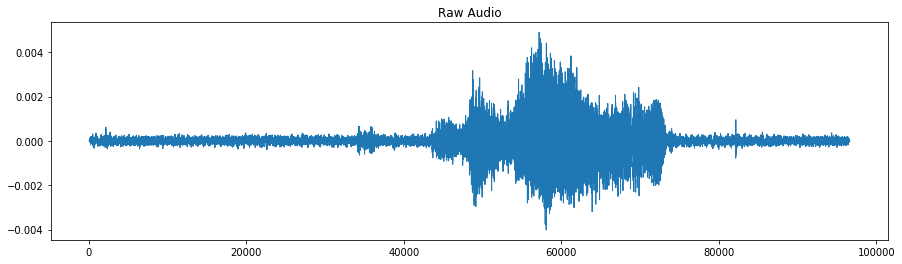

In [35]:
#plot the data to get idea of what it looks like
# we will make it to pandas series
pd.Series(y).plot(figsize=(15,4),lw=1,title="Raw Audio")
plt.show()  #we see lot of disturnace, we will remove blank spaces

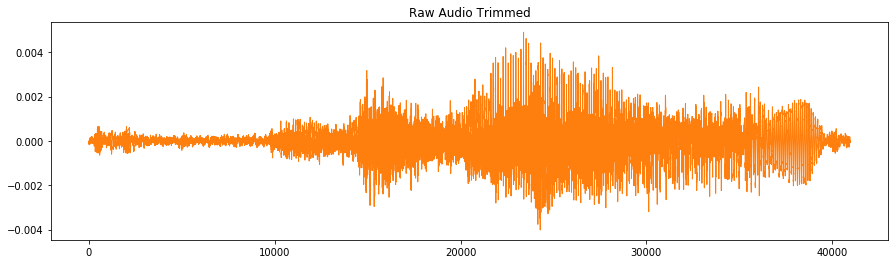

In [39]:
# we trim the audio
y_trimmed,_=librosa.effects.trim(y,top_db=20)
#plot the data to get idea of what it looks like
# we will make it to pandas series #                           After Trimming
pd.Series(y_trimmed).plot(figsize=(15,4),lw=1,title="Raw Audio Trimmed",color=color_pal[1])
plt.show()  #we see lot of disturnace, we will remove blank spaces  # thisis the area with sound only

In [40]:
# Spectrogram; to look at frequency and check how powerful they are
D=librosa.stft(y)

In [43]:
S_db=librosa.amplitude_to_db(np.abs(D),ref=np.max)  # converting it to decibel

In [44]:
S_db.shape

(1025, 189)

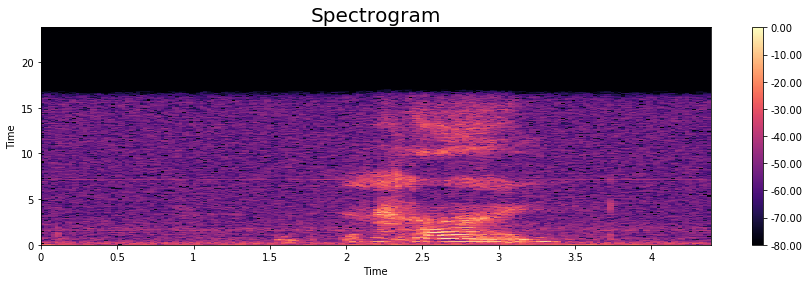

In [50]:
# #plot the transformed data
fig,ax=plt.subplots(figsize=(15,4))
img=librosa.display.specshow(S_db,x_axis="time",y_axis="time",ax=ax)
ax.set_title("Spectrogram",fontsize=20)
fig.colorbar(img,ax=ax,format=f"%0.2f")
plt.show()

In [52]:
# now we create Mel Spectrogram
S=librosa.feature.melspectrogram(y,sr=sr,n_mels=128,)
S.shape
S_db_mel=librosa.amplitude_to_db(S,ref=np.max)

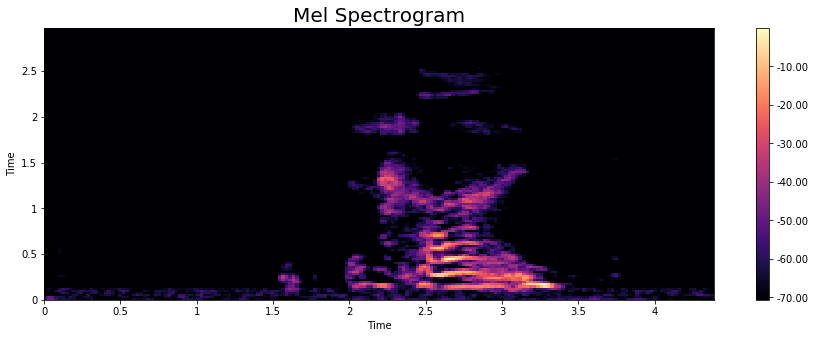

In [53]:
# #plot the transformed data
fig,ax=plt.subplots(figsize=(15,5))
img=librosa.display.specshow(S_db_mel,x_axis="time",y_axis="time",ax=ax)
ax.set_title("Mel Spectrogram",fontsize=20)
fig.colorbar(img,ax=ax,format=f"%0.2f")  # the audio is little accunated
plt.show()

In [54]:
S_db_mel

array([[-59.042305, -49.003174, -48.34233 , ..., -70.601524, -70.601524,
        -70.601524],
       [-60.832657, -48.732353, -50.516685, ..., -64.69207 , -65.73744 ,
        -66.252686],
       [-70.601524, -68.59043 , -70.601524, ..., -58.245384, -59.128754,
        -62.470184],
       ...,
       [-70.601524, -70.601524, -70.601524, ..., -70.601524, -70.601524,
        -70.601524],
       [-70.601524, -70.601524, -70.601524, ..., -70.601524, -70.601524,
        -70.601524],
       [-70.601524, -70.601524, -70.601524, ..., -70.601524, -70.601524,
        -70.601524]], dtype=float32)

In [23]:
metadata=pd.read_csv("C:\\Users\\lalit\\Downloads\\UASpeech_original_FM-006\\Speech\\UASpeech\\doc\\Speaker.xls",encoding="cp437")

In [21]:
with open('C:\\Users\\lalit\\Downloads\\UASpeech_original_FM-006\\Speech\\UASpeech\\doc\\Speaker.xls') as f:
    print(f)

<_io.TextIOWrapper name='C:\\Users\\lalit\\Downloads\\UASpeech_original_FM-006\\Speech\\UASpeech\\doc\\Speaker.xls' mode='r' encoding='cp1252'>


In [24]:
metadata.head()

,╨╧αí▒ß,"##0_);\(""$""#",##0\) !,"##0_);[Red]\(""$""#","##0\) ""","##0.00_);\(""$""#",##0.00\) ',"##0.00_);[Red]\(""$""#",##0.00\) 7,"##0_);_(""$""* \(#",...,"##0.00\);_(* ""-""??_);_(@_) ",##0_);\(\$#,##0\) ,##0_);[Red]\(\$#,##0\) ,##0.00_);\(\$#,##0.00\) %,##0.00_);[Red]\(\$#,##0.00\)α,Unnamed: 26
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,and F for female.,AAC and head devices,able to sign,able to sign,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117 entries, 0 to 1116
Data columns (total 27 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ╨╧αí▒ß                          19 non-null     object 
 1   ##0_);\("$"#                      11 non-null     object 
 2   ##0\)!                          3 non-null      object 
 3   ##0_);[Red]\("$"#                 2 non-null      object 
 4   ##0\)"                          1 non-null      object 
 5   ##0.00_);\("$"#                   0 non-null      float64
 6   ##0.00\)'                       0 non-null      float64
 7   ##0.00_);[Red]\("$"#              0 non-null      float64
 8   ##0.00\)7                       0 non-null      float64
 9   ##0_);_("$"* \(#                  0 non-null      float64
 10  ##0\);_("$"* "-"_);_(@_).       0 non-null      float64
 11  ##0_);_(* \(#                     0 non-null      float64
 12  ##0\);

In [ ]:
# Loading the dysarthric speech dataset
data = pd.read_csv('dysarthric_speech.csv')

# Splitting the dataset into train and test sets
train_data = data.sample(frac=0.8, random_state=0)
test_data = data.drop(train_data.index)

# Preprocessing the data
train_labels = train_data.pop('label')
test_labels = test_data.pop('label')
train_features = np.array(train_data)
test_features = np.array(test_data)

# Creating the LSTM model
model = keras.Sequential()
model.add(layers.Bidirectional(layers.LSTM(64, return_sequences=True), input_shape=(train_features.shape[1], 1)))
model.add(layers.Bidirectional(layers.LSTM(64)))
model.add(layers.Dense(1, activation='sigmoid'))

# Compiling the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fitting the model to the training data
history = model.fit(train_features.reshape(train_features.shape[0], train_features.shape[1], 1), train_labels, epochs=50, validation_split=0.2)

# Evaluating the model on the test data
test_loss, test_acc = model.evaluate(test_features.reshape(test_features.shape[0], test_features.shape[1], 1), test_labels)
print('Test accuracy:', test_acc)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatte
from tensorflow.keras.optimizers import Adam


In [9]:
#Original Paper
!pip install scispacy
!pip install pysoundfile
!apt-get install libav-tools -y
!apt-get install zip

'apt-get' is not recognized as an internal or external command,
operable program or batch file.
'apt-get' is not recognized as an internal or external command,
operable program or batch file.


In [12]:
from fastai.text import *
from fastai.vision import *
import spacy
from spacy import displacy
import scispacy
import librosa
import librosa.display
import soundfile as sf
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import IPython
import os
from glob import glob
from tqdm import tqdm
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import pylab
import gc
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [11]:
!pip install fastai

In [13]:
df=pd.read_csv("E:\Education\sem 10\overview-of-recordings.csv")
df.head()

,audio_clipping,audio_clipping:confidence,background_noise_audible,background_noise_audible:confidence,overall_quality_of_the_audio,quiet_speaker,quiet_speaker:confidence,speaker_id,file_download,file_name,phrase,prompt,writer_id
0,no_clipping,1.0000,light_noise,1.0000,3.33,audible_speaker,1.0,43453425,https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...,1249120_43453425_58166571.wav,When I remember her I feel down,Emotional pain,21665495
1,light_clipping,0.6803,no_noise,0.6803,3.33,audible_speaker,1.0,43719934,https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...,1249120_43719934_43347848.wav,When I carry heavy things I feel like breaking...,Hair falling out,44088126
2,no_clipping,1.0000,no_noise,0.6655,3.33,audible_speaker,1.0,43719934,https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...,1249120_43719934_53187202.wav,there is too much pain when i move my arm,Heart hurts,44292353
3,no_clipping,1.0000,light_noise,1.0000,3.33,audible_speaker,1.0,31349958,https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...,1249120_31349958_55816195.wav,My son had his lip pierced and it is swollen a...,Infected wound,43755034
4,no_clipping,1.0000,no_noise,1.0000,4.67,audible_speaker,1.0,43719934,https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...,1249120_43719934_82524191.wav,My muscles in my lower back are aching,Infected wound,21665495


In [14]:
def get_wav_info(wav_file):
    data, rate = sf.read(wav_file)
    return data, rate

def create_spectrogram(wav_file):
    # adapted from Andrew Ng Deep Learning Specialization Course 5
    data, rate = get_wav_info(wav_file)
    nfft = 200 # Length of each window segment
    fs = 8000 # Sampling frequencies
    noverlap = 120 # Overlap between windows
    nchannels = data.ndim
    if nchannels == 1:
        pxx, freqs, bins, im = plt.specgram(data, nfft, fs, noverlap = noverlap)
    elif nchannels == 2:
        pxx, freqs, bins, im = plt.specgram(data[:,0], nfft, fs, noverlap = noverlap)
    return pxx

def create_melspectrogram(filename,name):
    # adapted from https://www.kaggle.com/devilsknight/sound-classification-using-spectrogram-images
    plt.interactive(False)
    clip, sample_rate = librosa.load(filename, sr=None)
    fig = plt.figure(figsize=[0.72,0.72])
    ax = fig.add_subplot(111)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.set_frame_on(False)
    S = librosa.feature.melspectrogram(y=clip, sr=sample_rate)
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max))
    filename  = Path('/kaggle/working/spectrograms/' + name + '.jpg')
    plt.savefig(filename, dpi=400, bbox_inches='tight',pad_inches=0)
    plt.close()    
    fig.clf()
    plt.close(fig)
    plt.close('all')
    del filename,name,clip,sample_rate,fig,ax,S

def wordBarGraphFunction(df,column,title):
    # adapted from https://www.kaggle.com/benhamner/most-common-forum-topic-words
    topic_words = [ z.lower() for y in
                       [ x.split() for x in df[column] if isinstance(x, str)]
                       for z in y]
    word_count_dict = dict(Counter(topic_words))
    popular_words = sorted(word_count_dict, key = word_count_dict.get, reverse = True)
    popular_words_nonstop = [w for w in popular_words if w not in stopwords.words("english")]
    plt.barh(range(50), [word_count_dict[w] for w in reversed(popular_words_nonstop[0:50])])
    plt.yticks([x + 0.5 for x in range(50)], reversed(popular_words_nonstop[0:50]))
    plt.title(title)
    plt.show()

def wordCloudFunction(df,column,numWords):
    topic_words = [ z.lower() for y in
                       [ x.split() for x in df[column] if isinstance(x, str)]
                       for z in y]
    word_count_dict = dict(Counter(topic_words))
    popular_words = sorted(word_count_dict, key = word_count_dict.get, reverse = True)
    popular_words_nonstop = [w for w in popular_words if w not in stopwords.words("english")]
    word_string=str(popular_words_nonstop)
    wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white',
                          max_words=numWords,
                          width=1000,height=1000,
                         ).generate(word_string)
    plt.clf()
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

In [15]:
overview = pd.read_csv('E:\Education\sem 10\overview-of-recordings.csv')
overview = overview[['file_name','phrase','prompt','overall_quality_of_the_audio','speaker_id']]
overview=overview.dropna()
overviewAudio = overview[['file_name','prompt']]
overviewAudio['spec_name'] = overviewAudio['file_name'].str.rstrip('.wav')
overviewAudio = overviewAudio[['spec_name','prompt']]
overviewText = overview[['phrase','prompt']]
noNaNcsv = 'E:\Education\sem 10\overview-of-recordings.csv'
noNaNcsv = pd.read_csv(noNaNcsv)
noNaNcsv = noNaNcsv.dropna()
noNaNcsv = noNaNcsv.to_csv('overview-of-recordings.csv',index=False)
noNaNcsv

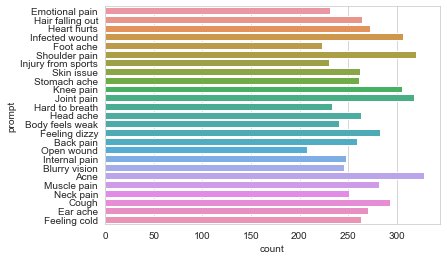

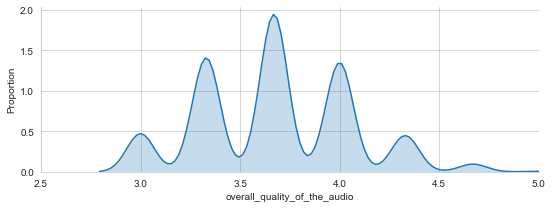

In [16]:
sns.set_style("whitegrid")
promptsPlot = sns.countplot(y='prompt',data=overview)
promptsPlot

qualityPlot = sns.FacetGrid(overview,aspect=2.5)
qualityPlot.map(sns.kdeplot,'overall_quality_of_the_audio',shade= True)
qualityPlot.set(xlim=(2.5, overview['overall_quality_of_the_audio'].max()))
qualityPlot.set_axis_labels('overall_quality_of_the_audio', 'Proportion')
qualityPlot

In [19]:
en_core_sci_sm = 'C:\\Users\\lalit\\Downloads\\scapy\\Scispacy Pretrained Models\\en_core_sci_sm-0.1.0\\en_core_sci_sm\\en_core_sci_sm-0.1.0'
nlp = spacy.load(en_core_sci_sm)
 

OSError: [E053] Could not read config file from C:\Users\lalit\Downloads\scapy\Scispacy Pretrained Models\en_core_sci_sm-0.1.0\en_core_sci_sm\en_core_sci_sm-0.1.0\config.cfg

In [20]:
!pip install -U spacy
!pip install scispacy

^C
  Using cached spacy-3.4.4-cp37-cp37m-win_amd64.whl (12.1 MB)
  Attempting uninstall: spacy
    Found existing installation: spacy 3.5.1
    Uninstalling spacy-3.5.1:
      Successfully uninstalled spacy-3.5.1


In [21]:
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.2.4/en_core_sci_sm-0.2.4.tar.gz

^C


In [ ]:
# *****************************************************************************#
# Parkinson Disease 

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
from xgboost import XGBClassifier

In [81]:
import os
for dirname, _, filenames in os.walk('C:\\Users\\lalit\\Downloads'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
# Attempt 2


C:\Users\lalit\Downloads\1-s2.0-S1319157821000860-main.docx
C:\Users\lalit\Downloads\1.jpeg
C:\Users\lalit\Downloads\11.docx
C:\Users\lalit\Downloads\1111.pdf
C:\Users\lalit\Downloads\50 Leetcode Problems to practice.txt
C:\Users\lalit\Downloads\76e82e153441c231fe135472b86e10ff.jpg
C:\Users\lalit\Downloads\7th sem.pdf
C:\Users\lalit\Downloads\7z1900-x64.exe
C:\Users\lalit\Downloads\A Guide to SQL 8th edition - Philip Pratt & Mary Last.pdf
C:\Users\lalit\Downloads\Amazon_Sample_Test_with_answers.pdf
C:\Users\lalit\Downloads\Amrita Assessment results - to college.xlsx
C:\Users\lalit\Downloads\Anaconda3-2020.02-Windows-x86_64.exe
C:\Users\lalit\Downloads\Analog_webserver.ino
C:\Users\lalit\Downloads\android-studio-ide-201.6953283-windows.exe
C:\Users\lalit\Downloads\annotations.zip
C:\Users\lalit\Downloads\applicant.csv
C:\Users\lalit\Downloads\archive (1).zip
C:\Users\lalit\Downloads\archive.zip
C:\Users\lalit\Downloads\arduino-1.8.19.exe
C:\Users\lalit\Downloads\Assignment1.pdf
C:\Users

C:\Users\lalit\Downloads\cudnn-11.0-windows-x64-v8.0.1.13\cuda\include\cudnn.h
C:\Users\lalit\Downloads\cudnn-11.0-windows-x64-v8.0.1.13\cuda\include\cudnn_adv_infer.h
C:\Users\lalit\Downloads\cudnn-11.0-windows-x64-v8.0.1.13\cuda\include\cudnn_adv_train.h
C:\Users\lalit\Downloads\cudnn-11.0-windows-x64-v8.0.1.13\cuda\include\cudnn_backend.h
C:\Users\lalit\Downloads\cudnn-11.0-windows-x64-v8.0.1.13\cuda\include\cudnn_cnn_infer.h
C:\Users\lalit\Downloads\cudnn-11.0-windows-x64-v8.0.1.13\cuda\include\cudnn_cnn_train.h
C:\Users\lalit\Downloads\cudnn-11.0-windows-x64-v8.0.1.13\cuda\include\cudnn_ops_infer.h
C:\Users\lalit\Downloads\cudnn-11.0-windows-x64-v8.0.1.13\cuda\include\cudnn_ops_train.h
C:\Users\lalit\Downloads\cudnn-11.0-windows-x64-v8.0.1.13\cuda\include\cudnn_version.h
C:\Users\lalit\Downloads\cudnn-11.0-windows-x64-v8.0.1.13\cuda\lib\x64\cudnn.lib
C:\Users\lalit\Downloads\cudnn-11.0-windows-x64-v8.0.1.13\cuda\lib\x64\cudnn64_8.lib
C:\Users\lalit\Downloads\cudnn-11.0-windows-x64

C:\Users\lalit\Downloads\gcloud_dataflow_beam_code-lalit-curtailment-cloudfuct\optimax-ds-pipelines\dataflow-templates\clear-day-finder-downstream\main.py
C:\Users\lalit\Downloads\gcloud_dataflow_beam_code-lalit-curtailment-cloudfuct\optimax-ds-pipelines\dataflow-templates\clear-day-finder-downstream\setup.py
C:\Users\lalit\Downloads\gcloud_dataflow_beam_code-lalit-curtailment-cloudfuct\optimax-ds-pipelines\dataflow-templates\clear-day-finder-downstream\__init__ (2).py
C:\Users\lalit\Downloads\gcloud_dataflow_beam_code-lalit-curtailment-cloudfuct\optimax-ds-pipelines\dataflow-templates\clear-day-finder-downstream\__init__.py
C:\Users\lalit\Downloads\gcloud_dataflow_beam_code-lalit-curtailment-cloudfuct\optimax-ds-pipelines\dataflow-templates\clear-day-finder-downstream\utils\text_io.py
C:\Users\lalit\Downloads\gcloud_dataflow_beam_code-lalit-curtailment-cloudfuct\optimax-ds-pipelines\dataflow-templates\clear-day-finder-downstream\utils\__init__.py
C:\Users\lalit\Downloads\gcloud_datafl

C:\Users\lalit\Downloads\labelimg\.github\no-response.yml
C:\Users\lalit\Downloads\labelimg\.github\workflows\package.yml
C:\Users\lalit\Downloads\labelimg\build-tools\.gitignore
C:\Users\lalit\Downloads\labelimg\build-tools\build-for-macos.sh
C:\Users\lalit\Downloads\labelimg\build-tools\build-for-pypi.sh
C:\Users\lalit\Downloads\labelimg\build-tools\build-ubuntu-binary.sh
C:\Users\lalit\Downloads\labelimg\build-tools\build-windows-binary.sh
C:\Users\lalit\Downloads\labelimg\build-tools\envsetup.sh
C:\Users\lalit\Downloads\labelimg\build-tools\README.md
C:\Users\lalit\Downloads\labelimg\build-tools\run-in-container.sh
C:\Users\lalit\Downloads\labelimg\data\predefined_classes.txt
C:\Users\lalit\Downloads\labelimg\demo\demo.jpg
C:\Users\lalit\Downloads\labelimg\demo\demo3.jpg
C:\Users\lalit\Downloads\labelimg\demo\demo4.png
C:\Users\lalit\Downloads\labelimg\demo\demo5.png
C:\Users\lalit\Downloads\labelimg\libs\canvas.py
C:\Users\lalit\Downloads\labelimg\libs\colorDialog.py
C:\Users\lali

C:\Users\lalit\Downloads\mingw-w64-v10.0.0\build-aux\config.guess
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\build-aux\config.sub
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\build-aux\install-sh
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\build-aux\missing
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\COPYING.MinGW-w64\COPYING.MinGW-w64.txt
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\COPYING.MinGW-w64-runtime\COPYING.MinGW-w64-runtime.txt
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\aclocal.m4
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\ChangeLog
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\ChangeLog.2009
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\ChangeLog.2010
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\ChangeLog.2011
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\ChangeLog.2012
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\ChangeLog.2013
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\config.h.in

C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\intrincs\outword.c
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\intrincs\outwordstring.c
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\intrincs\rdtsc.c
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\intrincs\readcr0.c
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\intrincs\readcr2.c
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\intrincs\readcr3.c
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\intrincs\readcr4.c
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\intrincs\readcr8.c
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\intrincs\readfsbyte.c
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\intrincs\readfsdword.c
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\intrincs\readfsword.c
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\intrincs\readgsbyte.c
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\intrincs\readg

C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\lib32\aclui.def
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\lib32\activeds.def
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\lib32\adsldpc.def
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\lib32\advapi32.def
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\lib32\apcups.def
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\lib32\api-ms-win-appmodel-runtime-l1-1-0.def
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\lib32\api-ms-win-appmodel-runtime-l1-1-1.def
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\lib32\api-ms-win-core-com-l1-1-0.def
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\lib32\api-ms-win-core-com-l1-1-1.def
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\lib32\api-ms-win-core-com-l2-1-1.def
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\lib32\api-ms-win-core-com-midlproxystub-l1-1-0.def
C:\Users\lalit\Downloads\mingw-w

C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\lib32\cscapi.def
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\lib32\ctl3d32.def
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\lib32\d2d1.def
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\lib32\d3d10.def
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\lib32\d3d11.def
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\lib32\d3d12.def
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\lib32\d3d8.def
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\lib32\d3d9.def
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\lib32\d3dcompiler_33.def
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\lib32\d3dcompiler_34.def
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\lib32\d3dcompiler_35.def
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\lib32\d3dcompiler_36.def
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\lib32\d3dcompiler_37.def
C:\Use

C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\lib32\p2pgraph.def
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\lib32\pcwum.def
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\lib32\pdh.def
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\lib32\pdhui.def
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\lib32\penwin32.def
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\lib32\pkpd32.def
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\lib32\powrprof.def
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\lib32\prntvpt.def
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\lib32\propsys.def
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\lib32\psapi.def
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\lib32\quartz.def
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\lib32\query.def
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\lib32\qutil.def
C:\Users\lalit\Downloads\mingw-w64-v10

C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\lib64\aclui.def
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\lib64\admparse.def
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\lib64\admwprox.def
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\lib64\adptif.def
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\lib64\adsiisex.def
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\lib64\adsldpc.def
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\lib64\agentanm.def
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\lib64\akscoinst.def
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\lib64\alrsvc.def
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\lib64\apcups.def
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\lib64\apphelp.def
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\lib64\aqueue.def
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\lib64\asp.def
C:\Users\lalit\Downloads\ming

C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\lib64\hypertrm.def
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\lib64\iaspolcy.def
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\lib64\icaapi.def
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\lib64\icfgnt5.def
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\lib64\icwconn.def
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\lib64\icwdial.def
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\lib64\icwdl.def
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\lib64\icwphbk.def
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\lib64\icwutil.def
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\lib64\idq.def
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\lib64\ieakeng.def
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\lib64\iedkcs32.def
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\lib64\ieencode.def
C:\Users\lalit\Downloads\min

C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\lib64\pautoenr.def
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\lib64\pdh.def
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\lib64\pidgen.def
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\lib64\pintlcsd.def
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\lib64\policman.def
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\lib64\polstore.def
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\lib64\printui.def
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\lib64\profmap.def
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\lib64\PS5UI.def
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\lib64\psbase.def
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\lib64\pschdprf.def
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\lib64\PSCRIPT5.def
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\lib64\pstorsvc.def
C:\Users\lalit\Downloads\m

C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\libarm32\aclui.def
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\libarm32\acppage.def
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\libarm32\acproxy.def
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\libarm32\actionqueue.def
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\libarm32\adhapi.def
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\libarm32\adhsvc.def
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\libarm32\admtmpl.def
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\libarm32\adsldpc.def
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\libarm32\aecache.def
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\libarm32\aeinv.def
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\libarm32\aelupsvc.def
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\libarm32\aepdu.def
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\libarm32\a

C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\libarm32\fvewiz.def
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\libarm32\fwremotesvr.def
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\libarm32\gameux.def
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\libarm32\geofencemonitorservice.def
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\libarm32\globcollationhost.def
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\libarm32\globinputhost.def
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\libarm32\gpapi.def
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\libarm32\gpprefcl.def
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\libarm32\gpprnext.def
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\libarm32\gpscript.def
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\libarm32\gpsvc.def
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\libarm32\gptext.def
C:\Users\lalit\Downloads\mingw-w6

C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\libarm32\vpnike.def
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\libarm32\vpnikeapi.def
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\libarm32\vssapi.def
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\libarm32\vsstrace.def
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\libarm32\wbiosrvc.def
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\libarm32\wcl.def
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\libarm32\wcletw.def
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\libarm32\wclpowrprof.def
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\libarm32\wclsqm.def
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\libarm32\wclunicode.def
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\libarm32\wclwdi.def
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\libarm32\wcmapi.def
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\libarm

C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\libsrc\dinput_joy.c
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\libsrc\dinput_joy2.c
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\libsrc\dinput_kbd.c
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\libsrc\dinput_mouse.c
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\libsrc\dinput_mouse2.c
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\libsrc\dinput_private.h
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\libsrc\dmoguids.c
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\libsrc\docobj-uuid.c
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\libsrc\dxerr.c
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\libsrc\dxerr8.c
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\libsrc\dxerr8w.c
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\libsrc\dxerr9.c
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\libsrc\dxerr9w.c
C:\Users\

C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\math\softmath\acosf.c
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\math\softmath\acosh.c
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\math\softmath\acoshf.c
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\math\softmath\acoshl.c
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\math\softmath\acosl.c
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\math\softmath\asinf.c
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\math\softmath\asinh.c
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\math\softmath\asinhf.c
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\math\softmath\asinhl.c
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\math\softmath\asinl.c
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\math\softmath\atan2f.c
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\math\softmath\atan2l.c
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\min

C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\stdio\mingw_vfscanf.c
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\stdio\mingw_vprintf.c
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\stdio\mingw_vprintfw.c
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\stdio\mingw_vsnprintf.c
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\stdio\mingw_vsnprintfw.c
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\stdio\mingw_vsprintf.c
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\stdio\mingw_vsprintfw.c
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\stdio\mingw_wscanf.c
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\stdio\mingw_wvfscanf.c
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\stdio\scanf.S
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\stdio\scanf2-argcount-char.c
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-crt\stdio\scanf2-argcount-template.c
C:\Users\lalit\Downloads\mingw-w6

C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-doc\howto-build\mingw-w64-howto-build-adv.txt
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-doc\howto-build\mingw-w64-howto-build.txt
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-headers\aclocal.m4
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-headers\ChangeLog
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-headers\ChangeLog.2009
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-headers\ChangeLog.2010
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-headers\ChangeLog.2011
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-headers\ChangeLog.2012
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-headers\ChangeLog.2013
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-headers\config.h.in
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-headers\configure
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-headers\configure.ac
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-headers\Make

C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-headers\crt\sec_api\conio_s.h
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-headers\crt\sec_api\crtdbg_s.h
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-headers\crt\sec_api\mbstring_s.h
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-headers\crt\sec_api\search_s.h
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-headers\crt\sec_api\stdio_s.h
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-headers\crt\sec_api\stdlib_s.h
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-headers\crt\sec_api\stralign_s.h
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-headers\crt\sec_api\string_s.h
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-headers\crt\sec_api\tchar_s.h
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-headers\crt\sec_api\wchar_s.h
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-headers\crt\sec_api\sys\timeb_s.h
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-headers\crt\sys\cdef

C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-headers\include\accctrl.h
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-headers\include\aclapi.h
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-headers\include\aclui.h
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-headers\include\activation.h
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-headers\include\activation.idl
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-headers\include\activaut.h
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-headers\include\activaut.idl
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-headers\include\activdbg.h
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-headers\include\activdbg.idl
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-headers\include\activdbg100.h
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-headers\include\activdbg100.idl
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-headers\include\activecf.h
C:\Users\lalit\Downloads\min

C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-headers\include\bits5_0.h
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-headers\include\bits5_0.idl
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-headers\include\bitscfg.h
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-headers\include\bitsmsg.h
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-headers\include\blberr.h
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-headers\include\bluetoothapis.h
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-headers\include\bthdef.h
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-headers\include\bthsdpdef.h
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-headers\include\bugcodes.h
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-headers\include\callobj.h
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-headers\include\cardmod.h
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-headers\include\casetup.h
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\

C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-headers\include\dmusicf.h
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-headers\include\dmusici.h
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-headers\include\dmusics.h
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-headers\include\docobj.h
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-headers\include\docobj.idl
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-headers\include\docobjectservice.h
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-headers\include\docobjectservice.idl
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-headers\include\documenttarget.h
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-headers\include\documenttarget.idl
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-headers\include\domdid.h
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-headers\include\downloadmgr.h
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-headers\include\downloadmgr.idl
C:\User

C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-headers\include\mmstream.h
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-headers\include\mmstream.idl
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-headers\include\mmsystem.h
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-headers\include\mobsync.h
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-headers\include\moniker.h
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-headers\include\mpeg2bits.h
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-headers\include\mpeg2data.h
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-headers\include\mpeg2psiparser.h
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-headers\include\mpeg2structs.h
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-headers\include\mprapi.h
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-headers\include\mprerror.h
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-headers\include\mq.h
C:\Users\lalit\Downloads\mingw-w64-v

C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-headers\include\routprot.h
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-headers\include\rpc.h
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-headers\include\rpcasync.h
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-headers\include\rpcdce.h
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-headers\include\rpcdcep.h
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-headers\include\rpcndr.h
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-headers\include\rpcnsi.h
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-headers\include\rpcnsip.h
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-headers\include\rpcnterr.h
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-headers\include\rpcproxy.h
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-headers\include\rpcsal.h
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-headers\include\rpcssl.h
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-head

C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-headers\include\wmdrmsdk.h
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-headers\include\wmdrmsdk.idl
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-headers\include\wmiatlprov.h
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-headers\include\wmistr.h
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-headers\include\wmiutils.h
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-headers\include\wmp.h
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-headers\include\wmp.idl
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-headers\include\wmpids.h
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-headers\include\wmprealestate.h
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-headers\include\wmprealestate.idl
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-headers\include\wmpservices.h
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-headers\include\wmpservices.idl
C:\Users\lalit\Downloads\min

C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-libraries\libmangle\aclocal.m4
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-libraries\libmangle\ChangeLog
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-libraries\libmangle\ChangeLog.2009
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-libraries\libmangle\ChangeLog.2010
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-libraries\libmangle\ChangeLog.2011
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-libraries\libmangle\ChangeLog.2012
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-libraries\libmangle\ChangeLog.2013
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-libraries\libmangle\config.h.in
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-libraries\libmangle\configure
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-libraries\libmangle\configure.ac
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-libraries\libmangle\COPYING
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-libra

C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-libraries\winpthreads\tests_pthread\cleanup2.c
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-libraries\winpthreads\tests_pthread\cleanup3.c
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-libraries\winpthreads\tests_pthread\condvar1.c
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-libraries\winpthreads\tests_pthread\condvar1_1.c
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-libraries\winpthreads\tests_pthread\condvar1_2.c
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-libraries\winpthreads\tests_pthread\condvar2.c
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-libraries\winpthreads\tests_pthread\condvar2_1.c
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-libraries\winpthreads\tests_pthread\condvar3.c
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-libraries\winpthreads\tests_pthread\condvar3_1.c
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-libraries\winpthreads\tests_pthread\con

C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-libraries\winstorecompat\src\LocalAlloc.c
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-libraries\winstorecompat\src\LocalFree.c
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-libraries\winstorecompat\src\QueueTimer.c
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-libraries\winstorecompat\src\RtlAddFunctionTable.c
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-libraries\winstorecompat\src\RtlCaptureContext.c
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-libraries\winstorecompat\src\RtlRestoreContext.c
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-libraries\winstorecompat\src\RtlVirtualUnwind.c
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-libraries\winstorecompat\src\SetErrorMode.c
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-libraries\winstorecompat\src\SetFilePointer.c
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-libraries\winstorecompat\src\SetUnhandledExceptionFilter.c

C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-tools\widl\src\client.c
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-tools\widl\src\expr.c
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-tools\widl\src\expr.h
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-tools\widl\src\hash.c
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-tools\widl\src\hash.h
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-tools\widl\src\header.c
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-tools\widl\src\header.h
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-tools\widl\src\parser.h
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-tools\widl\src\parser.l
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-tools\widl\src\parser.tab.c
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-tools\widl\src\parser.tab.h
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-tools\widl\src\parser.y
C:\Users\lalit\Downloads\mingw-w64-v10.0.0\mingw-w64-tools\widl\src\parser.y

C:\Users\lalit\Downloads\models\official\legacy\detection\configs\base_config.py
C:\Users\lalit\Downloads\models\official\legacy\detection\configs\factory.py
C:\Users\lalit\Downloads\models\official\legacy\detection\configs\maskrcnn_config.py
C:\Users\lalit\Downloads\models\official\legacy\detection\configs\olnmask_config.py
C:\Users\lalit\Downloads\models\official\legacy\detection\configs\retinanet_config.py
C:\Users\lalit\Downloads\models\official\legacy\detection\configs\shapemask_config.py
C:\Users\lalit\Downloads\models\official\legacy\detection\configs\__init__.py
C:\Users\lalit\Downloads\models\official\legacy\detection\dataloader\anchor.py
C:\Users\lalit\Downloads\models\official\legacy\detection\dataloader\factory.py
C:\Users\lalit\Downloads\models\official\legacy\detection\dataloader\input_reader.py
C:\Users\lalit\Downloads\models\official\legacy\detection\dataloader\maskrcnn_parser.py
C:\Users\lalit\Downloads\models\official\legacy\detection\dataloader\mode_keys.py
C:\Users\

C:\Users\lalit\Downloads\models\official\legacy\xlnet\__init__.py
C:\Users\lalit\Downloads\models\official\modeling\grad_utils.py
C:\Users\lalit\Downloads\models\official\modeling\grad_utils_test.py
C:\Users\lalit\Downloads\models\official\modeling\performance.py
C:\Users\lalit\Downloads\models\official\modeling\tf_utils.py
C:\Users\lalit\Downloads\models\official\modeling\tf_utils_test.py
C:\Users\lalit\Downloads\models\official\modeling\__init__.py
C:\Users\lalit\Downloads\models\official\modeling\activations\gelu.py
C:\Users\lalit\Downloads\models\official\modeling\activations\gelu_test.py
C:\Users\lalit\Downloads\models\official\modeling\activations\mish.py
C:\Users\lalit\Downloads\models\official\modeling\activations\mish_test.py
C:\Users\lalit\Downloads\models\official\modeling\activations\relu.py
C:\Users\lalit\Downloads\models\official\modeling\activations\relu_test.py
C:\Users\lalit\Downloads\models\official\modeling\activations\sigmoid.py
C:\Users\lalit\Downloads\models\offic

C:\Users\lalit\Downloads\models\official\nlp\modeling\README.md
C:\Users\lalit\Downloads\models\official\nlp\modeling\__init__.py
C:\Users\lalit\Downloads\models\official\nlp\modeling\layers\attention.py
C:\Users\lalit\Downloads\models\official\nlp\modeling\layers\attention_test.py
C:\Users\lalit\Downloads\models\official\nlp\modeling\layers\bigbird_attention.py
C:\Users\lalit\Downloads\models\official\nlp\modeling\layers\bigbird_attention_test.py
C:\Users\lalit\Downloads\models\official\nlp\modeling\layers\block_diag_feedforward.py
C:\Users\lalit\Downloads\models\official\nlp\modeling\layers\block_diag_feedforward_test.py
C:\Users\lalit\Downloads\models\official\nlp\modeling\layers\cls_head.py
C:\Users\lalit\Downloads\models\official\nlp\modeling\layers\cls_head_test.py
C:\Users\lalit\Downloads\models\official\nlp\modeling\layers\factorized_embedding.py
C:\Users\lalit\Downloads\models\official\nlp\modeling\layers\factorized_embedding_test.py
C:\Users\lalit\Downloads\models\official\nl

C:\Users\lalit\Downloads\models\official\nlp\serving\export_savedmodel.py
C:\Users\lalit\Downloads\models\official\nlp\serving\export_savedmodel_test.py
C:\Users\lalit\Downloads\models\official\nlp\serving\export_savedmodel_util.py
C:\Users\lalit\Downloads\models\official\nlp\serving\serving_modules.py
C:\Users\lalit\Downloads\models\official\nlp\serving\serving_modules_test.py
C:\Users\lalit\Downloads\models\official\nlp\serving\__init__.py
C:\Users\lalit\Downloads\models\official\nlp\tasks\dual_encoder.py
C:\Users\lalit\Downloads\models\official\nlp\tasks\dual_encoder_test.py
C:\Users\lalit\Downloads\models\official\nlp\tasks\electra_task.py
C:\Users\lalit\Downloads\models\official\nlp\tasks\electra_task_test.py
C:\Users\lalit\Downloads\models\official\nlp\tasks\masked_lm.py
C:\Users\lalit\Downloads\models\official\nlp\tasks\masked_lm_determinism_test.py
C:\Users\lalit\Downloads\models\official\nlp\tasks\masked_lm_test.py
C:\Users\lalit\Downloads\models\official\nlp\tasks\question_an

C:\Users\lalit\Downloads\models\official\projects\centernet\modeling\backbones\hourglass.py
C:\Users\lalit\Downloads\models\official\projects\centernet\modeling\backbones\hourglass_test.py
C:\Users\lalit\Downloads\models\official\projects\centernet\modeling\backbones\__init__.py
C:\Users\lalit\Downloads\models\official\projects\centernet\modeling\heads\centernet_head.py
C:\Users\lalit\Downloads\models\official\projects\centernet\modeling\heads\centernet_head_test.py
C:\Users\lalit\Downloads\models\official\projects\centernet\modeling\heads\__init__.py
C:\Users\lalit\Downloads\models\official\projects\centernet\modeling\layers\cn_nn_blocks.py
C:\Users\lalit\Downloads\models\official\projects\centernet\modeling\layers\cn_nn_blocks_test.py
C:\Users\lalit\Downloads\models\official\projects\centernet\modeling\layers\detection_generator.py
C:\Users\lalit\Downloads\models\official\projects\centernet\modeling\layers\__init__.py
C:\Users\lalit\Downloads\models\official\projects\centernet\ops\bo

C:\Users\lalit\Downloads\models\official\projects\edgetpu\vision\README.md
C:\Users\lalit\Downloads\models\official\projects\edgetpu\vision\train.py
C:\Users\lalit\Downloads\models\official\projects\edgetpu\vision\__init__.py
C:\Users\lalit\Downloads\models\official\projects\edgetpu\vision\configs\mobilenet_edgetpu_config.py
C:\Users\lalit\Downloads\models\official\projects\edgetpu\vision\configs\semantic_segmentation_config.py
C:\Users\lalit\Downloads\models\official\projects\edgetpu\vision\configs\semantic_segmentation_searched_config.py
C:\Users\lalit\Downloads\models\official\projects\edgetpu\vision\configs\__init__.py
C:\Users\lalit\Downloads\models\official\projects\edgetpu\vision\dataloaders\classification_input.py
C:\Users\lalit\Downloads\models\official\projects\edgetpu\vision\dataloaders\classification_input_test.py
C:\Users\lalit\Downloads\models\official\projects\edgetpu\vision\dataloaders\__init__.py
C:\Users\lalit\Downloads\models\official\projects\edgetpu\vision\modeling

C:\Users\lalit\Downloads\models\official\projects\panoptic\tasks\panoptic_deeplab.py
C:\Users\lalit\Downloads\models\official\projects\panoptic\tasks\panoptic_maskrcnn.py
C:\Users\lalit\Downloads\models\official\projects\panoptic\tasks\__init__.py
C:\Users\lalit\Downloads\models\official\projects\pruning\README.md
C:\Users\lalit\Downloads\models\official\projects\pruning\registry_imports.py
C:\Users\lalit\Downloads\models\official\projects\pruning\train.py
C:\Users\lalit\Downloads\models\official\projects\pruning\configs\image_classification.py
C:\Users\lalit\Downloads\models\official\projects\pruning\configs\image_classification_test.py
C:\Users\lalit\Downloads\models\official\projects\pruning\configs\__init__.py
C:\Users\lalit\Downloads\models\official\projects\pruning\configs\experiments\image_classification\imagenet_mobilenetv2_pruning_gpu.yaml
C:\Users\lalit\Downloads\models\official\projects\pruning\configs\experiments\image_classification\imagenet_resnet50_pruning_gpu.yaml
C:\Us

C:\Users\lalit\Downloads\models\official\projects\simclr\common\registry_imports.py
C:\Users\lalit\Downloads\models\official\projects\simclr\configs\multitask_config.py
C:\Users\lalit\Downloads\models\official\projects\simclr\configs\multitask_config_test.py
C:\Users\lalit\Downloads\models\official\projects\simclr\configs\simclr.py
C:\Users\lalit\Downloads\models\official\projects\simclr\configs\simclr_test.py
C:\Users\lalit\Downloads\models\official\projects\simclr\configs\experiments\cifar_simclr_pretrain.yaml
C:\Users\lalit\Downloads\models\official\projects\simclr\configs\experiments\imagenet_simclr_finetune_gpu.yaml
C:\Users\lalit\Downloads\models\official\projects\simclr\configs\experiments\imagenet_simclr_finetune_tpu.yaml
C:\Users\lalit\Downloads\models\official\projects\simclr\configs\experiments\imagenet_simclr_multitask_tpu.yaml
C:\Users\lalit\Downloads\models\official\projects\simclr\configs\experiments\imagenet_simclr_pretrain_gpu.yaml
C:\Users\lalit\Downloads\models\offic

C:\Users\lalit\Downloads\models\official\projects\volumetric_models\modeling\heads\segmentation_heads_3d.py
C:\Users\lalit\Downloads\models\official\projects\volumetric_models\modeling\heads\segmentation_heads_3d_test.py
C:\Users\lalit\Downloads\models\official\projects\volumetric_models\serving\export_saved_model.py
C:\Users\lalit\Downloads\models\official\projects\volumetric_models\serving\semantic_segmentation_3d.py
C:\Users\lalit\Downloads\models\official\projects\volumetric_models\serving\semantic_segmentation_3d_test.py
C:\Users\lalit\Downloads\models\official\projects\volumetric_models\tasks\semantic_segmentation_3d.py
C:\Users\lalit\Downloads\models\official\projects\volumetric_models\tasks\semantic_segmentation_3d_test.py
C:\Users\lalit\Downloads\models\official\projects\waste_identification_ml\README.md
C:\Users\lalit\Downloads\models\official\projects\waste_identification_ml\model_conversion\checkpoints_to_savedModel_to_tflite.ipynb
C:\Users\lalit\Downloads\models\official\p

C:\Users\lalit\Downloads\models\official\recommendation\create_ncf_data.py
C:\Users\lalit\Downloads\models\official\recommendation\data_pipeline.py
C:\Users\lalit\Downloads\models\official\recommendation\data_preprocessing.py
C:\Users\lalit\Downloads\models\official\recommendation\data_test.py
C:\Users\lalit\Downloads\models\official\recommendation\movielens.py
C:\Users\lalit\Downloads\models\official\recommendation\ncf_common.py
C:\Users\lalit\Downloads\models\official\recommendation\ncf_input_pipeline.py
C:\Users\lalit\Downloads\models\official\recommendation\ncf_keras_main.py
C:\Users\lalit\Downloads\models\official\recommendation\ncf_test.py
C:\Users\lalit\Downloads\models\official\recommendation\neumf_model.py
C:\Users\lalit\Downloads\models\official\recommendation\popen_helper.py
C:\Users\lalit\Downloads\models\official\recommendation\README.md
C:\Users\lalit\Downloads\models\official\recommendation\run.sh
C:\Users\lalit\Downloads\models\official\recommendation\stat_utils.py
C:\U

C:\Users\lalit\Downloads\models\official\vision\configs\experiments\maskrcnn\coco_mobilenetv2_mrcnn_tpu.yaml
C:\Users\lalit\Downloads\models\official\vision\configs\experiments\maskrcnn\coco_spinenet143_cascadercnn_tpu.yaml
C:\Users\lalit\Downloads\models\official\vision\configs\experiments\maskrcnn\coco_spinenet143_mrcnn_tpu.yaml
C:\Users\lalit\Downloads\models\official\vision\configs\experiments\maskrcnn\coco_spinenet49_cascadercnn_tpu.yaml
C:\Users\lalit\Downloads\models\official\vision\configs\experiments\maskrcnn\coco_spinenet49_mrcnn_tpu.yaml
C:\Users\lalit\Downloads\models\official\vision\configs\experiments\maskrcnn\coco_spinenet96_cascadercnn_tpu.yaml
C:\Users\lalit\Downloads\models\official\vision\configs\experiments\maskrcnn\coco_spinenet96_mrcnn_tpu.yaml
C:\Users\lalit\Downloads\models\official\vision\configs\experiments\maskrcnn\r50fpn_640_coco_scratch_tpu4x4.yaml
C:\Users\lalit\Downloads\models\official\vision\configs\experiments\retinanet\coco_mobiledetcpu_tpu.yaml
C:\Us

C:\Users\lalit\Downloads\models\official\vision\ops\anchor.py
C:\Users\lalit\Downloads\models\official\vision\ops\anchor_generator.py
C:\Users\lalit\Downloads\models\official\vision\ops\anchor_generator_test.py
C:\Users\lalit\Downloads\models\official\vision\ops\anchor_test.py
C:\Users\lalit\Downloads\models\official\vision\ops\augment.py
C:\Users\lalit\Downloads\models\official\vision\ops\augment_test.py
C:\Users\lalit\Downloads\models\official\vision\ops\box_matcher.py
C:\Users\lalit\Downloads\models\official\vision\ops\box_matcher_test.py
C:\Users\lalit\Downloads\models\official\vision\ops\box_ops.py
C:\Users\lalit\Downloads\models\official\vision\ops\iou_similarity.py
C:\Users\lalit\Downloads\models\official\vision\ops\iou_similarity_test.py
C:\Users\lalit\Downloads\models\official\vision\ops\mask_ops.py
C:\Users\lalit\Downloads\models\official\vision\ops\mask_ops_test.py
C:\Users\lalit\Downloads\models\official\vision\ops\nms.py
C:\Users\lalit\Downloads\models\official\vision\ops\

C:\Users\lalit\Downloads\models\research\autoaugment\augmentation_transforms.py
C:\Users\lalit\Downloads\models\research\autoaugment\custom_ops.py
C:\Users\lalit\Downloads\models\research\autoaugment\data_utils.py
C:\Users\lalit\Downloads\models\research\autoaugment\helper_utils.py
C:\Users\lalit\Downloads\models\research\autoaugment\policies.py
C:\Users\lalit\Downloads\models\research\autoaugment\README.md
C:\Users\lalit\Downloads\models\research\autoaugment\shake_drop.py
C:\Users\lalit\Downloads\models\research\autoaugment\shake_shake.py
C:\Users\lalit\Downloads\models\research\autoaugment\train_cifar.py
C:\Users\lalit\Downloads\models\research\autoaugment\wrn.py
C:\Users\lalit\Downloads\models\research\cognitive_planning\BUILD
C:\Users\lalit\Downloads\models\research\cognitive_planning\command
C:\Users\lalit\Downloads\models\research\cognitive_planning\embedders.py
C:\Users\lalit\Downloads\models\research\cognitive_planning\label_map.txt
C:\Users\lalit\Downloads\models\research\cogn

C:\Users\lalit\Downloads\models\research\deeplab\g3doc\export_model.md
C:\Users\lalit\Downloads\models\research\deeplab\g3doc\faq.md
C:\Users\lalit\Downloads\models\research\deeplab\g3doc\installation.md
C:\Users\lalit\Downloads\models\research\deeplab\g3doc\model_zoo.md
C:\Users\lalit\Downloads\models\research\deeplab\g3doc\pascal.md
C:\Users\lalit\Downloads\models\research\deeplab\g3doc\quantize.md
C:\Users\lalit\Downloads\models\research\deeplab\g3doc\img\image1.jpg
C:\Users\lalit\Downloads\models\research\deeplab\g3doc\img\image2.jpg
C:\Users\lalit\Downloads\models\research\deeplab\g3doc\img\image3.jpg
C:\Users\lalit\Downloads\models\research\deeplab\g3doc\img\image_info.txt
C:\Users\lalit\Downloads\models\research\deeplab\g3doc\img\vis1.png
C:\Users\lalit\Downloads\models\research\deeplab\g3doc\img\vis2.png
C:\Users\lalit\Downloads\models\research\deeplab\g3doc\img\vis3.png
C:\Users\lalit\Downloads\models\research\deeplab\testing\info.md
C:\Users\lalit\Downloads\models\research\de

C:\Users\lalit\Downloads\models\research\efficient-hrl\agents\circular_buffer.py
C:\Users\lalit\Downloads\models\research\efficient-hrl\agents\ddpg_agent.py
C:\Users\lalit\Downloads\models\research\efficient-hrl\agents\ddpg_networks.py
C:\Users\lalit\Downloads\models\research\efficient-hrl\agents\__init__.py
C:\Users\lalit\Downloads\models\research\efficient-hrl\configs\base_uvf.gin
C:\Users\lalit\Downloads\models\research\efficient-hrl\configs\eval_uvf.gin
C:\Users\lalit\Downloads\models\research\efficient-hrl\configs\train_uvf.gin
C:\Users\lalit\Downloads\models\research\efficient-hrl\context\context.py
C:\Users\lalit\Downloads\models\research\efficient-hrl\context\context_transition_functions.py
C:\Users\lalit\Downloads\models\research\efficient-hrl\context\gin_imports.py
C:\Users\lalit\Downloads\models\research\efficient-hrl\context\gin_utils.py
C:\Users\lalit\Downloads\models\research\efficient-hrl\context\rewards_functions.py
C:\Users\lalit\Downloads\models\research\efficient-hrl

C:\Users\lalit\Downloads\models\research\lstm_object_detection\utils\config_util.py
C:\Users\lalit\Downloads\models\research\lstm_object_detection\utils\config_util_test.py
C:\Users\lalit\Downloads\models\research\lstm_object_detection\utils\__init__.py
C:\Users\lalit\Downloads\models\research\marco\Automated_Marco.py
C:\Users\lalit\Downloads\models\research\marco\jpeg2json.py
C:\Users\lalit\Downloads\models\research\marco\README.md
C:\Users\lalit\Downloads\models\research\marco\request.json
C:\Users\lalit\Downloads\models\research\nst_blogpost\4_Neural_Style_Transfer_with_Eager_Execution.ipynb
C:\Users\lalit\Downloads\models\research\nst_blogpost\Green_Sea_Turtle_grazing_seagrass.jpg
C:\Users\lalit\Downloads\models\research\nst_blogpost\The_Great_Wave_off_Kanagawa.jpg
C:\Users\lalit\Downloads\models\research\nst_blogpost\wave_turtle.png
C:\Users\lalit\Downloads\models\research\object_detection\CONTRIBUTING.md
C:\Users\lalit\Downloads\models\research\object_detection\eval_util.py
C:\Us

C:\Users\lalit\Downloads\models\research\object_detection\configs\tf2\centernet_hourglass104_1024x1024_coco17_tpu-32.config
C:\Users\lalit\Downloads\models\research\object_detection\configs\tf2\centernet_hourglass104_1024x1024_kpts_coco17_tpu-32.config
C:\Users\lalit\Downloads\models\research\object_detection\configs\tf2\centernet_hourglass104_512x512_coco17_tpu-8.config
C:\Users\lalit\Downloads\models\research\object_detection\configs\tf2\centernet_hourglass104_512x512_kpts_coco17_tpu-32.config
C:\Users\lalit\Downloads\models\research\object_detection\configs\tf2\centernet_resnet101_v1_fpn_512x512_coco17_tpu-8.config
C:\Users\lalit\Downloads\models\research\object_detection\configs\tf2\centernet_resnet50_v1_fpn_512x512_kpts_coco17_tpu-8.config
C:\Users\lalit\Downloads\models\research\object_detection\configs\tf2\centernet_resnet50_v2_512x512_kpts_coco17_tpu-8.config
C:\Users\lalit\Downloads\models\research\object_detection\configs\tf2\center_net_deepmac_1024x1024_coco_tpu-128.config
C

C:\Users\lalit\Downloads\models\research\object_detection\dataset_tools\context_rcnn\add_context_to_examples.py
C:\Users\lalit\Downloads\models\research\object_detection\dataset_tools\context_rcnn\add_context_to_examples_tf2_test.py
C:\Users\lalit\Downloads\models\research\object_detection\dataset_tools\context_rcnn\create_cococameratraps_tfexample_main.py
C:\Users\lalit\Downloads\models\research\object_detection\dataset_tools\context_rcnn\create_cococameratraps_tfexample_tf2_test.py
C:\Users\lalit\Downloads\models\research\object_detection\dataset_tools\context_rcnn\generate_detection_data.py
C:\Users\lalit\Downloads\models\research\object_detection\dataset_tools\context_rcnn\generate_detection_data_tf2_test.py
C:\Users\lalit\Downloads\models\research\object_detection\dataset_tools\context_rcnn\generate_embedding_data.py
C:\Users\lalit\Downloads\models\research\object_detection\dataset_tools\context_rcnn\generate_embedding_data_tf2_test.py
C:\Users\lalit\Downloads\models\research\obje

C:\Users\lalit\Downloads\models\research\object_detection\models\keras_models\convert_keras_models.py
C:\Users\lalit\Downloads\models\research\object_detection\models\keras_models\hourglass_network.py
C:\Users\lalit\Downloads\models\research\object_detection\models\keras_models\hourglass_network_tf2_test.py
C:\Users\lalit\Downloads\models\research\object_detection\models\keras_models\inception_resnet_v2.py
C:\Users\lalit\Downloads\models\research\object_detection\models\keras_models\inception_resnet_v2_tf2_test.py
C:\Users\lalit\Downloads\models\research\object_detection\models\keras_models\mobilenet_v1.py
C:\Users\lalit\Downloads\models\research\object_detection\models\keras_models\mobilenet_v1_tf2_test.py
C:\Users\lalit\Downloads\models\research\object_detection\models\keras_models\mobilenet_v2.py
C:\Users\lalit\Downloads\models\research\object_detection\models\keras_models\mobilenet_v2_tf2_test.py
C:\Users\lalit\Downloads\models\research\object_detection\models\keras_models\model_ut

C:\Users\lalit\Downloads\models\research\object_detection\samples\configs\faster_rcnn_resnet101_voc07.config
C:\Users\lalit\Downloads\models\research\object_detection\samples\configs\faster_rcnn_resnet152_coco.config
C:\Users\lalit\Downloads\models\research\object_detection\samples\configs\faster_rcnn_resnet152_pets.config
C:\Users\lalit\Downloads\models\research\object_detection\samples\configs\faster_rcnn_resnet50_coco.config
C:\Users\lalit\Downloads\models\research\object_detection\samples\configs\faster_rcnn_resnet50_fgvc.config
C:\Users\lalit\Downloads\models\research\object_detection\samples\configs\faster_rcnn_resnet50_pets.config
C:\Users\lalit\Downloads\models\research\object_detection\samples\configs\mask_rcnn_inception_resnet_v2_atrous_coco.config
C:\Users\lalit\Downloads\models\research\object_detection\samples\configs\mask_rcnn_inception_v2_coco.config
C:\Users\lalit\Downloads\models\research\object_detection\samples\configs\mask_rcnn_resnet101_atrous_coco.config
C:\Users\

C:\Users\lalit\Downloads\models\research\object_detection\tpu_exporters\export_saved_model_tpu.py
C:\Users\lalit\Downloads\models\research\object_detection\tpu_exporters\export_saved_model_tpu_lib.py
C:\Users\lalit\Downloads\models\research\object_detection\tpu_exporters\export_saved_model_tpu_lib_tf1_test.py
C:\Users\lalit\Downloads\models\research\object_detection\tpu_exporters\faster_rcnn.py
C:\Users\lalit\Downloads\models\research\object_detection\tpu_exporters\ssd.py
C:\Users\lalit\Downloads\models\research\object_detection\tpu_exporters\utils.py
C:\Users\lalit\Downloads\models\research\object_detection\tpu_exporters\utils_test.py
C:\Users\lalit\Downloads\models\research\object_detection\tpu_exporters\__init__.py
C:\Users\lalit\Downloads\models\research\object_detection\tpu_exporters\testdata\__init__.py
C:\Users\lalit\Downloads\models\research\object_detection\tpu_exporters\testdata\faster_rcnn\faster_rcnn_resnet101_atrous_coco.config
C:\Users\lalit\Downloads\models\research\obje

C:\Users\lalit\Downloads\models\research\seq_flow_lite\models\sgnn\sgnn_projection_op_resolver.h
C:\Users\lalit\Downloads\models\research\seq_flow_lite\models\sgnn\sgnn_projection_test.cc
C:\Users\lalit\Downloads\models\research\seq_flow_lite\models\sgnn\sgnn_test.py
C:\Users\lalit\Downloads\models\research\seq_flow_lite\models\sgnn\train.py
C:\Users\lalit\Downloads\models\research\seq_flow_lite\tflite_ops\beam_search.cc
C:\Users\lalit\Downloads\models\research\seq_flow_lite\tflite_ops\beam_search.h
C:\Users\lalit\Downloads\models\research\seq_flow_lite\tflite_ops\beam_search_test.cc
C:\Users\lalit\Downloads\models\research\seq_flow_lite\tflite_ops\BUILD
C:\Users\lalit\Downloads\models\research\seq_flow_lite\tflite_ops\denylist.cc
C:\Users\lalit\Downloads\models\research\seq_flow_lite\tflite_ops\denylist.h
C:\Users\lalit\Downloads\models\research\seq_flow_lite\tflite_ops\denylist_skipgram.cc
C:\Users\lalit\Downloads\models\research\seq_flow_lite\tflite_ops\denylist_skipgram.h
C:\Users\

C:\Users\lalit\Downloads\models\research\slim\nets\mobilenet\conv_blocks.py
C:\Users\lalit\Downloads\models\research\slim\nets\mobilenet\mnet_v1_vs_v2_pixel1_latency.png
C:\Users\lalit\Downloads\models\research\slim\nets\mobilenet\mobilenet.py
C:\Users\lalit\Downloads\models\research\slim\nets\mobilenet\mobilenet_example.ipynb
C:\Users\lalit\Downloads\models\research\slim\nets\mobilenet\mobilenet_v2.py
C:\Users\lalit\Downloads\models\research\slim\nets\mobilenet\mobilenet_v2_test.py
C:\Users\lalit\Downloads\models\research\slim\nets\mobilenet\mobilenet_v3.py
C:\Users\lalit\Downloads\models\research\slim\nets\mobilenet\mobilenet_v3_test.py
C:\Users\lalit\Downloads\models\research\slim\nets\mobilenet\README.md
C:\Users\lalit\Downloads\models\research\slim\nets\mobilenet\__init__.py
C:\Users\lalit\Downloads\models\research\slim\nets\mobilenet\g3doc\edgetpu_latency.png
C:\Users\lalit\Downloads\models\research\slim\nets\mobilenet\g3doc\latency_pixel1.png
C:\Users\lalit\Downloads\models\rese

C:\Users\lalit\Downloads\Plant-Leaf-Disease-Prediction-main\Dataset\train\Tomato - Early_blight\Tomato___Early_blight (15).JPG
C:\Users\lalit\Downloads\Plant-Leaf-Disease-Prediction-main\Dataset\train\Tomato - Early_blight\Tomato___Early_blight (2).JPG
C:\Users\lalit\Downloads\Plant-Leaf-Disease-Prediction-main\Dataset\train\Tomato - Early_blight\Tomato___Early_blight (3).JPG
C:\Users\lalit\Downloads\Plant-Leaf-Disease-Prediction-main\Dataset\train\Tomato - Early_blight\Tomato___Early_blight (4).JPG
C:\Users\lalit\Downloads\Plant-Leaf-Disease-Prediction-main\Dataset\train\Tomato - Early_blight\Tomato___Early_blight (5).JPG
C:\Users\lalit\Downloads\Plant-Leaf-Disease-Prediction-main\Dataset\train\Tomato - Early_blight\Tomato___Early_blight (6).JPG
C:\Users\lalit\Downloads\Plant-Leaf-Disease-Prediction-main\Dataset\train\Tomato - Early_blight\Tomato___Early_blight (7).JPG
C:\Users\lalit\Downloads\Plant-Leaf-Disease-Prediction-main\Dataset\train\Tomato - Early_blight\Tomato___Early_blight

C:\Users\lalit\Downloads\Plant-Leaf-Disease-Prediction-main\Dataset\train\Tomato - Tomato_mosaic_virus\Tomato___Tomato_mosaic_virus (10).JPG
C:\Users\lalit\Downloads\Plant-Leaf-Disease-Prediction-main\Dataset\train\Tomato - Tomato_mosaic_virus\Tomato___Tomato_mosaic_virus (11).JPG
C:\Users\lalit\Downloads\Plant-Leaf-Disease-Prediction-main\Dataset\train\Tomato - Tomato_mosaic_virus\Tomato___Tomato_mosaic_virus (12).JPG
C:\Users\lalit\Downloads\Plant-Leaf-Disease-Prediction-main\Dataset\train\Tomato - Tomato_mosaic_virus\Tomato___Tomato_mosaic_virus (13).JPG
C:\Users\lalit\Downloads\Plant-Leaf-Disease-Prediction-main\Dataset\train\Tomato - Tomato_mosaic_virus\Tomato___Tomato_mosaic_virus (14).JPG
C:\Users\lalit\Downloads\Plant-Leaf-Disease-Prediction-main\Dataset\train\Tomato - Tomato_mosaic_virus\Tomato___Tomato_mosaic_virus (15).JPG
C:\Users\lalit\Downloads\Plant-Leaf-Disease-Prediction-main\Dataset\train\Tomato - Tomato_mosaic_virus\Tomato___Tomato_mosaic_virus (2).JPG
C:\Users\lalit

C:\Users\lalit\Downloads\Plant-Leaf-Disease-Prediction-main\static\upload\1.JPG
C:\Users\lalit\Downloads\Plant-Leaf-Disease-Prediction-main\static\upload\2.JPG
C:\Users\lalit\Downloads\Plant-Leaf-Disease-Prediction-main\static\upload\4.JPG
C:\Users\lalit\Downloads\Plant-Leaf-Disease-Prediction-main\static\upload\6.JPG
C:\Users\lalit\Downloads\Plant-Leaf-Disease-Prediction-main\static\upload\Tomato___Bacterial_spot (1).JPG
C:\Users\lalit\Downloads\Plant-Leaf-Disease-Prediction-main\static\upload\Tomato___Bacterial_spot (4).JPG
C:\Users\lalit\Downloads\Plant-Leaf-Disease-Prediction-main\static\upload\Tomato___Bacterial_spot (8).JPG
C:\Users\lalit\Downloads\Plant-Leaf-Disease-Prediction-main\static\upload\Tomato___Bacterial_spot (9).JPG
C:\Users\lalit\Downloads\Plant-Leaf-Disease-Prediction-main\static\upload\Tomato___Bacterial_spot_4.JPG
C:\Users\lalit\Downloads\Plant-Leaf-Disease-Prediction-main\static\upload\Tomato___Early_blight (1).JPG
C:\Users\lalit\Downloads\Plant-Leaf-Disease-Pred

C:\Users\lalit\Downloads\scapy\Scispacy Pretrained Models\en_core_sci_md-0.1.0\en_core_sci_md.egg-info\dependency_links.txt
C:\Users\lalit\Downloads\scapy\Scispacy Pretrained Models\en_core_sci_md-0.1.0\en_core_sci_md.egg-info\not-zip-safe
C:\Users\lalit\Downloads\scapy\Scispacy Pretrained Models\en_core_sci_md-0.1.0\en_core_sci_md.egg-info\PKG-INFO
C:\Users\lalit\Downloads\scapy\Scispacy Pretrained Models\en_core_sci_md-0.1.0\en_core_sci_md.egg-info\requires.txt
C:\Users\lalit\Downloads\scapy\Scispacy Pretrained Models\en_core_sci_md-0.1.0\en_core_sci_md.egg-info\SOURCES.txt
C:\Users\lalit\Downloads\scapy\Scispacy Pretrained Models\en_core_sci_md-0.1.0\en_core_sci_md.egg-info\top_level.txt
C:\Users\lalit\Downloads\scapy\Scispacy Pretrained Models\en_core_sci_sm-0.1.0\MANIFEST.in
C:\Users\lalit\Downloads\scapy\Scispacy Pretrained Models\en_core_sci_sm-0.1.0\meta.json
C:\Users\lalit\Downloads\scapy\Scispacy Pretrained Models\en_core_sci_sm-0.1.0\PKG-INFO
C:\Users\lalit\Downloads\scapy\S

C:\Users\lalit\Downloads\scapy\Scispacy Pretrained Models\Scispacy Pretrained Models\en_core_sci_md-0.1.0\en_core_sci_md.egg-info\dependency_links.txt
C:\Users\lalit\Downloads\scapy\Scispacy Pretrained Models\Scispacy Pretrained Models\en_core_sci_md-0.1.0\en_core_sci_md.egg-info\not-zip-safe
C:\Users\lalit\Downloads\scapy\Scispacy Pretrained Models\Scispacy Pretrained Models\en_core_sci_md-0.1.0\en_core_sci_md.egg-info\PKG-INFO
C:\Users\lalit\Downloads\scapy\Scispacy Pretrained Models\Scispacy Pretrained Models\en_core_sci_md-0.1.0\en_core_sci_md.egg-info\requires.txt
C:\Users\lalit\Downloads\scapy\Scispacy Pretrained Models\Scispacy Pretrained Models\en_core_sci_md-0.1.0\en_core_sci_md.egg-info\SOURCES.txt
C:\Users\lalit\Downloads\scapy\Scispacy Pretrained Models\Scispacy Pretrained Models\en_core_sci_md-0.1.0\en_core_sci_md.egg-info\top_level.txt
C:\Users\lalit\Downloads\scapy\Scispacy Pretrained Models\Scispacy Pretrained Models\en_core_sci_sm-0.1.0\MANIFEST.in
C:\Users\lalit\Downl

C:\Users\lalit\Downloads\scapy\Scispacy Pretrained Models\Scispacy Pretrained Models\en_ner_bionlp13cg_md-0.1.0\en_ner_bionlp13cg_md.egg-info\dependency_links.txt
C:\Users\lalit\Downloads\scapy\Scispacy Pretrained Models\Scispacy Pretrained Models\en_ner_bionlp13cg_md-0.1.0\en_ner_bionlp13cg_md.egg-info\not-zip-safe
C:\Users\lalit\Downloads\scapy\Scispacy Pretrained Models\Scispacy Pretrained Models\en_ner_bionlp13cg_md-0.1.0\en_ner_bionlp13cg_md.egg-info\PKG-INFO
C:\Users\lalit\Downloads\scapy\Scispacy Pretrained Models\Scispacy Pretrained Models\en_ner_bionlp13cg_md-0.1.0\en_ner_bionlp13cg_md.egg-info\requires.txt
C:\Users\lalit\Downloads\scapy\Scispacy Pretrained Models\Scispacy Pretrained Models\en_ner_bionlp13cg_md-0.1.0\en_ner_bionlp13cg_md.egg-info\SOURCES.txt
C:\Users\lalit\Downloads\scapy\Scispacy Pretrained Models\Scispacy Pretrained Models\en_ner_bionlp13cg_md-0.1.0\en_ner_bionlp13cg_md.egg-info\top_level.txt
C:\Users\lalit\Downloads\scapy\Scispacy Pretrained Models\Scispacy

C:\Users\lalit\Downloads\T1\multiple_sentences\multiple_sentences\S_01_4321_VV3.wav
C:\Users\lalit\Downloads\T1\multiple_sentences\multiple_sentences\S_01_4321_VV4.wav
C:\Users\lalit\Downloads\T1\multiple_sentences\multiple_sentences\S_01_4321_VV5.wav
C:\Users\lalit\Downloads\T1\multiple_sentences\multiple_sentences\S_01_4326_VE1.wav
C:\Users\lalit\Downloads\T1\multiple_sentences\multiple_sentences\S_01_4326_VE2.wav
C:\Users\lalit\Downloads\T1\multiple_sentences\multiple_sentences\S_01_4326_VE3.wav
C:\Users\lalit\Downloads\T1\multiple_sentences\multiple_sentences\S_01_4326_VE4.wav
C:\Users\lalit\Downloads\T1\multiple_sentences\multiple_sentences\S_01_4326_VE5.wav
C:\Users\lalit\Downloads\T1\multiple_sentences\multiple_sentences\S_01_4326_VV1.wav
C:\Users\lalit\Downloads\T1\multiple_sentences\multiple_sentences\S_01_4326_VV2.wav
C:\Users\lalit\Downloads\T1\multiple_sentences\multiple_sentences\S_01_4326_VV3.wav
C:\Users\lalit\Downloads\T1\multiple_sentences\multiple_sentences\S_01_4326_

C:\Users\lalit\Downloads\T1\multiple_sentences\multiple_sentences\S_01_4678_VV2.wav
C:\Users\lalit\Downloads\T1\multiple_sentences\multiple_sentences\S_01_4678_VV3.wav
C:\Users\lalit\Downloads\T1\multiple_sentences\multiple_sentences\S_01_4678_VV4.wav
C:\Users\lalit\Downloads\T1\multiple_sentences\multiple_sentences\S_01_4678_VV5.wav
C:\Users\lalit\Downloads\T1\multiple_sentences\multiple_sentences\S_01_4689_VE1.wav
C:\Users\lalit\Downloads\T1\multiple_sentences\multiple_sentences\S_01_4689_VE2.wav
C:\Users\lalit\Downloads\T1\multiple_sentences\multiple_sentences\S_01_4689_VE3.wav
C:\Users\lalit\Downloads\T1\multiple_sentences\multiple_sentences\S_01_4689_VE4.wav
C:\Users\lalit\Downloads\T1\multiple_sentences\multiple_sentences\S_01_4689_VE5.wav
C:\Users\lalit\Downloads\T1\multiple_sentences\multiple_sentences\S_01_4689_VV1.wav
C:\Users\lalit\Downloads\T1\multiple_sentences\multiple_sentences\S_01_4689_VV2.wav
C:\Users\lalit\Downloads\T1\multiple_sentences\multiple_sentences\S_01_4689_

C:\Users\lalit\Downloads\T1\multiple_sentences\multiple_sentences\S_01_4904_VE5.wav
C:\Users\lalit\Downloads\T1\multiple_sentences\multiple_sentences\S_01_4904_VV1.wav
C:\Users\lalit\Downloads\T1\multiple_sentences\multiple_sentences\S_01_4904_VV2.wav
C:\Users\lalit\Downloads\T1\multiple_sentences\multiple_sentences\S_01_4904_VV3.wav
C:\Users\lalit\Downloads\T1\multiple_sentences\multiple_sentences\S_01_4904_VV4.wav
C:\Users\lalit\Downloads\T1\multiple_sentences\multiple_sentences\S_01_4904_VV5.wav
C:\Users\lalit\Downloads\T1\multiple_sentences\multiple_sentences\S_01_4905_VE1.wav
C:\Users\lalit\Downloads\T1\multiple_sentences\multiple_sentences\S_01_4905_VE2.wav
C:\Users\lalit\Downloads\T1\multiple_sentences\multiple_sentences\S_01_4905_VE3.wav
C:\Users\lalit\Downloads\T1\multiple_sentences\multiple_sentences\S_01_4905_VE4.wav
C:\Users\lalit\Downloads\T1\multiple_sentences\multiple_sentences\S_01_4905_VE5.wav
C:\Users\lalit\Downloads\T1\multiple_sentences\multiple_sentences\S_01_4905_

C:\Users\lalit\Downloads\T1\one_sentence\one_sentence\S_01_4001_VE.wav
C:\Users\lalit\Downloads\T1\one_sentence\one_sentence\S_01_4001_VV.wav
C:\Users\lalit\Downloads\T1\one_sentence\one_sentence\S_01_4003_VE.wav
C:\Users\lalit\Downloads\T1\one_sentence\one_sentence\S_01_4003_VV.wav
C:\Users\lalit\Downloads\T1\one_sentence\one_sentence\S_01_4004_VE.wav
C:\Users\lalit\Downloads\T1\one_sentence\one_sentence\S_01_4004_VV.wav
C:\Users\lalit\Downloads\T1\one_sentence\one_sentence\S_01_4006_VE.wav
C:\Users\lalit\Downloads\T1\one_sentence\one_sentence\S_01_4006_VV.wav
C:\Users\lalit\Downloads\T1\one_sentence\one_sentence\S_01_4007_VE.wav
C:\Users\lalit\Downloads\T1\one_sentence\one_sentence\S_01_4007_VV.wav
C:\Users\lalit\Downloads\T1\one_sentence\one_sentence\S_01_4008_VE.wav
C:\Users\lalit\Downloads\T1\one_sentence\one_sentence\S_01_4008_VV.wav
C:\Users\lalit\Downloads\T1\one_sentence\one_sentence\S_01_4012_VE.wav
C:\Users\lalit\Downloads\T1\one_sentence\one_sentence\S_01_4012_VV.wav
C:\Use

C:\Users\lalit\Downloads\T1\one_sentence\one_sentence\S_01_4330_VE.wav
C:\Users\lalit\Downloads\T1\one_sentence\one_sentence\S_01_4330_VV.wav
C:\Users\lalit\Downloads\T1\one_sentence\one_sentence\S_01_4331_VE.wav
C:\Users\lalit\Downloads\T1\one_sentence\one_sentence\S_01_4331_VV.wav
C:\Users\lalit\Downloads\T1\one_sentence\one_sentence\S_01_4334_VE.wav
C:\Users\lalit\Downloads\T1\one_sentence\one_sentence\S_01_4334_VV.wav
C:\Users\lalit\Downloads\T1\one_sentence\one_sentence\S_01_4335_VE.wav
C:\Users\lalit\Downloads\T1\one_sentence\one_sentence\S_01_4335_VV.wav
C:\Users\lalit\Downloads\T1\one_sentence\one_sentence\S_01_4338_VE.wav
C:\Users\lalit\Downloads\T1\one_sentence\one_sentence\S_01_4338_VV.wav
C:\Users\lalit\Downloads\T1\one_sentence\one_sentence\S_01_4339_VE.wav
C:\Users\lalit\Downloads\T1\one_sentence\one_sentence\S_01_4339_VV.wav
C:\Users\lalit\Downloads\T1\one_sentence\one_sentence\S_01_4340_VE.wav
C:\Users\lalit\Downloads\T1\one_sentence\one_sentence\S_01_4340_VV.wav
C:\Use

C:\Users\lalit\Downloads\T1\one_sentence\one_sentence\S_01_4907_VE.wav
C:\Users\lalit\Downloads\T1\one_sentence\one_sentence\S_01_4907_VV.wav
C:\Users\lalit\Downloads\T1\one_sentence\one_sentence\S_01_4908_VE.wav
C:\Users\lalit\Downloads\T1\one_sentence\one_sentence\S_01_4908_VV.wav
C:\Users\lalit\Downloads\T1\one_sentence\one_sentence\S_01_4912_VE.wav
C:\Users\lalit\Downloads\T1\one_sentence\one_sentence\S_01_4912_VV.wav
C:\Users\lalit\Downloads\T1\one_sentence\one_sentence\S_01_4914_VE.wav
C:\Users\lalit\Downloads\T1\one_sentence\one_sentence\S_01_4914_VV.wav
C:\Users\lalit\Downloads\T1\one_sentence\one_sentence\S_01_4917_VE.wav
C:\Users\lalit\Downloads\T1\one_sentence\one_sentence\S_01_4917_VV.wav
C:\Users\lalit\Downloads\T1\one_sentence\one_sentence\S_01_4918_VE.wav
C:\Users\lalit\Downloads\T1\one_sentence\one_sentence\S_01_4918_VV.wav
C:\Users\lalit\Downloads\T1\one_sentence\one_sentence\S_01_4919_VE.wav
C:\Users\lalit\Downloads\T1\one_sentence\one_sentence\S_01_4919_VV.wav
C:\Use

C:\Users\lalit\Downloads\T1\S_02_voice\S_02\multiple_sentences\S_02_4365_VV3.wav
C:\Users\lalit\Downloads\T1\S_02_voice\S_02\multiple_sentences\S_02_4365_VV4.wav
C:\Users\lalit\Downloads\T1\S_02_voice\S_02\multiple_sentences\S_02_4365_VV5.wav
C:\Users\lalit\Downloads\T1\S_02_voice\S_02\multiple_sentences\S_02_4387_VE1.wav
C:\Users\lalit\Downloads\T1\S_02_voice\S_02\multiple_sentences\S_02_4387_VE2.wav
C:\Users\lalit\Downloads\T1\S_02_voice\S_02\multiple_sentences\S_02_4387_VE3.wav
C:\Users\lalit\Downloads\T1\S_02_voice\S_02\multiple_sentences\S_02_4387_VE4.wav
C:\Users\lalit\Downloads\T1\S_02_voice\S_02\multiple_sentences\S_02_4387_VE5.wav
C:\Users\lalit\Downloads\T1\S_02_voice\S_02\multiple_sentences\S_02_4387_VV1.wav
C:\Users\lalit\Downloads\T1\S_02_voice\S_02\multiple_sentences\S_02_4387_VV2.wav
C:\Users\lalit\Downloads\T1\S_02_voice\S_02\multiple_sentences\S_02_4387_VV3.wav
C:\Users\lalit\Downloads\T1\S_02_voice\S_02\multiple_sentences\S_02_4387_VV4.wav
C:\Users\lalit\Downloads\T1\

C:\Users\lalit\Downloads\T1\S_02_voice\S_02\multiple_sentences\S_02_4739_VE3.wav
C:\Users\lalit\Downloads\T1\S_02_voice\S_02\multiple_sentences\S_02_4739_VE4.wav
C:\Users\lalit\Downloads\T1\S_02_voice\S_02\multiple_sentences\S_02_4739_VE5.wav
C:\Users\lalit\Downloads\T1\S_02_voice\S_02\multiple_sentences\S_02_4739_VV1.wav
C:\Users\lalit\Downloads\T1\S_02_voice\S_02\multiple_sentences\S_02_4739_VV2.wav
C:\Users\lalit\Downloads\T1\S_02_voice\S_02\multiple_sentences\S_02_4739_VV3.wav
C:\Users\lalit\Downloads\T1\S_02_voice\S_02\multiple_sentences\S_02_4739_VV4.wav
C:\Users\lalit\Downloads\T1\S_02_voice\S_02\multiple_sentences\S_02_4739_VV5.wav
C:\Users\lalit\Downloads\T1\S_02_voice\S_02\multiple_sentences\S_02_4743_VE1.wav
C:\Users\lalit\Downloads\T1\S_02_voice\S_02\multiple_sentences\S_02_4743_VE2.wav
C:\Users\lalit\Downloads\T1\S_02_voice\S_02\multiple_sentences\S_02_4743_VE3.wav
C:\Users\lalit\Downloads\T1\S_02_voice\S_02\multiple_sentences\S_02_4743_VE4.wav
C:\Users\lalit\Downloads\T1\

C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\._F02_B1_C1_M3.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B1_C10_M2.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B1_C10_M3.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B1_C10_M4.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B1_C10_M5.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B1_C10_M6.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B1_C10_M7.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B1_C10_M8.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B1_C11_M2.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\

C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B1_CW10_M3.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B1_CW10_M4.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B1_CW10_M5.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B1_CW10_M6.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B1_CW10_M7.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B1_CW10_M8.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B1_CW11_M2.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B1_CW11_M3.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B1_CW11_M4.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeec

C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B1_CW36_M6.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B1_CW36_M7.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B1_CW36_M8.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B1_CW37_M2.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B1_CW37_M3.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B1_CW37_M4.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B1_CW37_M5.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B1_CW37_M6.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B1_CW37_M7.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeec

C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B1_CW56_M7.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B1_CW56_M8.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B1_CW57_M2.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B1_CW57_M3.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B1_CW57_M4.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B1_CW57_M5.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B1_CW57_M6.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B1_CW57_M7.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B1_CW57_M8.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeec

C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B1_CW76_M5.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B1_CW76_M6.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B1_CW76_M7.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B1_CW76_M8.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B1_CW77_M2.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B1_CW77_M3.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B1_CW77_M4.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B1_CW77_M5.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B1_CW77_M6.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeec

C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B1_LK_M4.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B1_LK_M5.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B1_LK_M6.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B1_LK_M7.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B1_LK_M8.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B1_LL_M2.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B1_LL_M3.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B1_LL_M4.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B1_LL_M5.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F

C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B1_UW63_M2.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B1_UW63_M3.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B1_UW63_M4.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B1_UW63_M5.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B1_UW63_M6.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B1_UW63_M7.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B1_UW63_M8.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B1_UW64_M2.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B1_UW64_M3.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeec

C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B2_CW3_M5.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B2_CW3_M6.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B2_CW3_M7.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B2_CW3_M8.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B2_CW40_M2.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B2_CW40_M3.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B2_CW40_M4.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B2_CW40_M5.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B2_CW40_M6.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\au

C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B2_UW15_M5.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B2_UW15_M6.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B2_UW15_M7.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B2_UW15_M8.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B2_UW16_M2.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B2_UW16_M3.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B2_UW16_M4.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B2_UW16_M5.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B2_UW16_M6.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeec

C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B2_UW97_M3.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B2_UW97_M4.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B2_UW97_M5.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B2_UW97_M6.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B2_UW97_M7.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B2_UW97_M8.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B2_UW98_M2.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B2_UW98_M3.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B2_UW98_M4.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeec

C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B3_CW7_M2.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B3_CW7_M3.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B3_CW7_M4.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B3_CW7_M5.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B3_CW7_M6.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B3_CW7_M7.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B3_CW7_M8.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B3_CW80_M2.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B3_CW80_M3.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio

C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B3_UW21_M6.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B3_UW21_M7.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B3_UW21_M8.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B3_UW22_M2.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B3_UW22_M3.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B3_UW22_M4.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B3_UW22_M5.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B3_UW22_M6.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B3_UW22_M7.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeec

C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B3_UW89_M7.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B3_UW89_M8.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B3_UW8_M2.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B3_UW8_M3.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B3_UW8_M4.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B3_UW8_M5.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B3_UW8_M6.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B3_UW8_M7.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio\original\F02\F02_B3_UW8_M8.wav
C:\Users\lalit\Downloads\UASpeech_original_FM-006\Speech\UASpeech\audio

KeyboardInterrupt: 

In [82]:
df=pd.read_csv('C:\\Users\\lalit\\Downloads\\parkinsons.data')
print(df.shape,'\n')
df.head()

(195, 24) 



,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [83]:
X_un=df.copy()
X_un=X_un.drop(['name','status'],axis=1)
y_un=df[['status']]


In [84]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=3,test_size=0.2,random_state=24)

for train_index,test_index in split.split(X_un,y_un):
    strat_train_set_x,strat_train_y=X_un.loc[train_index],y_un.loc[train_index]
    strat_test_set_x,strat_test_y=X_un.loc[test_index],y_un.loc[test_index] 
    

In [85]:
from sklearn.metrics import precision_score, accuracy_score,recall_score
model=XGBClassifier(use_label_encoder=False,eval_metric='rmse')
model.fit(strat_train_set_x,strat_train_y)
y_pred=model.predict(strat_test_set_x)

print('accuracy score %.2f'% accuracy_score(y_pred,strat_test_y))
print('recall score %.2f'%recall_score(y_pred,strat_test_y))

accuracy score 0.97
recall score 0.97
